# Import libraries and data

In [51]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import re
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, balanced_accuracy_score, roc_auc_score, f1_score, \
    confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from utils import keep_first_uniprot, print_p_val
from matplotlib_venn import venn2, venn3

In [4]:
data_path = os.getcwd() + "/Datasets/"
fig_path = os.getcwd() + "/Figures/"

## Feature brain data set

In [5]:
df_features = pd.read_csv(data_path + "/Features/df_features_brain_elevated.csv")
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Glycosylation,GlycoMine_N,GlycoMine_O,GlycoMine_C,GPI-anchor,Signal peptide,RNA_binding,DNA_binding,Ectodomain_shedding,CSF
0,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0.0,0,1,0,0,0,0,0,0,-1
1,Q7L8C5,MVLSVPVIALGATLGTATSILALCGVTCLCRHMHPKKGLLPRDQDP...,426,46884.2716,0.084507,0.025822,0.042254,0.070423,0.014085,0.058685,...,0.0,1,0,0,0,0,0,0,0,-1
2,Q9BT88,MAEITNIRPSFDVSPVVAGLIGASVLVVCVSVTVFVWSCCHQQAEK...,431,48296.3314,0.039443,0.016241,0.064965,0.048724,0.034803,0.060325,...,0.0,1,0,0,0,0,0,0,0,1
3,A0A1B0GUX0,MSRQLNIDALRQNFWKEEYLREKMLRCEWYRKYGSMVKAKQKAKAA...,176,20388.6748,0.079545,0.017045,0.028409,0.056818,0.045455,0.034091,...,0.0,0,0,0,0,0,0,0,0,-1
4,Q5DID0,MLRTSGLALLALVSAVGPSQASGFTEKGLSLLGYQLCSHRVTHTVQ...,1318,144292.2583,0.064492,0.033384,0.036419,0.059939,0.031108,0.072079,...,0.0,1,1,0,0,1,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q7Z6G3,MCERAARLCRAGAHRLLREPPQQGRALGGLLRWVGARMGEPRESLA...,386,43193.2498,0.093264,0.020725,0.059585,0.088083,0.038860,0.062176,...,0.0,0,0,0,0,0,0,0,0,1
2538,P07196,MSSFSYEPYYSTSYKRRYVETPRVHISSVRSGYSTARSAYSSYSAP...,543,61515.8628,0.110497,0.001842,0.042357,0.182320,0.018416,0.036832,...,0.0,0,0,0,0,0,0,0,0,1
2539,Q9BZQ4,MTETTKTHVILLACGSFNPITKGHIQMFERARDYLHKTGRFIVIGG...,307,34438.2618,0.039088,0.029316,0.058632,0.045603,0.022801,0.061889,...,0.0,0,0,0,0,0,0,0,0,-1
2540,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0.0,0,0,0,0,0,0,0,0,-1


In [6]:
# drop non-sequence-based features
# df_features.drop(["Peroxisome", "Lysosome/Vacuole", "Plastid"], axis=1, inplace=True)
df_features.drop(["Ectodomain_shedding"], axis=1, inplace=True)
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,PS01186,Glycosylation,GlycoMine_N,GlycoMine_O,GlycoMine_C,GPI-anchor,Signal peptide,RNA_binding,DNA_binding,CSF
0,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0,0.0,0,1,0,0,0,0,0,-1
1,Q7L8C5,MVLSVPVIALGATLGTATSILALCGVTCLCRHMHPKKGLLPRDQDP...,426,46884.2716,0.084507,0.025822,0.042254,0.070423,0.014085,0.058685,...,0,0.0,1,0,0,0,0,0,0,-1
2,Q9BT88,MAEITNIRPSFDVSPVVAGLIGASVLVVCVSVTVFVWSCCHQQAEK...,431,48296.3314,0.039443,0.016241,0.064965,0.048724,0.034803,0.060325,...,0,0.0,1,0,0,0,0,0,0,1
3,A0A1B0GUX0,MSRQLNIDALRQNFWKEEYLREKMLRCEWYRKYGSMVKAKQKAKAA...,176,20388.6748,0.079545,0.017045,0.028409,0.056818,0.045455,0.034091,...,0,0.0,0,0,0,0,0,0,0,-1
4,Q5DID0,MLRTSGLALLALVSAVGPSQASGFTEKGLSLLGYQLCSHRVTHTVQ...,1318,144292.2583,0.064492,0.033384,0.036419,0.059939,0.031108,0.072079,...,0,0.0,1,1,0,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q7Z6G3,MCERAARLCRAGAHRLLREPPQQGRALGGLLRWVGARMGEPRESLA...,386,43193.2498,0.093264,0.020725,0.059585,0.088083,0.038860,0.062176,...,0,0.0,0,0,0,0,0,0,0,1
2538,P07196,MSSFSYEPYYSTSYKRRYVETPRVHISSVRSGYSTARSAYSSYSAP...,543,61515.8628,0.110497,0.001842,0.042357,0.182320,0.018416,0.036832,...,0,0.0,0,0,0,0,0,0,0,1
2539,Q9BZQ4,MTETTKTHVILLACGSFNPITKGHIQMFERARDYLHKTGRFIVIGG...,307,34438.2618,0.039088,0.029316,0.058632,0.045603,0.022801,0.061889,...,0,0.0,0,0,0,0,0,0,0,-1
2540,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0,0.0,0,0,0,0,0,0,0,-1


## CSF data set

In [7]:
csf = pd.read_csv(data_path + "CSF/csf.csv")

## Brain proteome (HPA)

In [8]:
brain_elevated = pd.read_csv(data_path + "Brain/Brain_elevated.csv")

In [9]:
# create data subsets based on tissue specificity
# tissue enhanced + group enriched + tissue enriched
brain_tissue_enhanced = set(brain_elevated["Uniprot"])
# group enriched + tissue enriched
brain_group_enriched = set(brain_elevated[brain_elevated["RNA tissue specificity"].isin(["Group enriched", 
    "Tissue enriched"])]["Uniprot"])
# tissue enriched
brain_tissue_enriched = set(brain_elevated[brain_elevated["RNA tissue specificity"] == "Tissue enriched"]["Uniprot"])

In [10]:
# create data subsets based on tissue distribution
# detected in all + many + some + single
brain_all = set(brain_elevated["Uniprot"])
# detected in many + some + single
brain_many = set(brain_elevated[brain_elevated["RNA tissue distribution"].isin(["Detected in many", "Detected in some",
    "Detected in single"])]["Uniprot"])
# detected in some + single
brain_some = set(brain_elevated[brain_elevated["RNA tissue distribution"].isin(["Detected in some", 
    "Detected in single"])]["Uniprot"])
# detected in single
brain_single = set(brain_elevated[brain_elevated["RNA tissue distribution"] == "Detected in single"]["Uniprot"])

# Machine Learning

In [11]:
# define variables and target
X = df_features.drop(["Uniprot", "Sequence", "CSF"], axis=1)
y = df_features["CSF"]

In [12]:
X.columns

Index(['Length', 'Molecular weight', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y',
       'Isoelectric point', 'Instability index', 'Polar', 'Neutral',
       'Hydrophobic', 'Volume_small', 'Volume_medium', 'Volume_large',
       'Polarity_low', 'Polarity_medium', 'Polarity_large',
       'Polarizability_low', 'Polarizability_medium', 'Polarizability_large',
       'Charge_positive', 'Charge_neutral', 'Charge_negative', 'Buried',
       'Exposed', 'Intermediate', 'Disorder_NSP', 'Helix_NSP', 'Turn_NSP',
       'Sheet_NSP', 'Solubility', 'ExpAA', 'First60ExpAA', 'PredHel',
       'PredHel_binary', 'Cytoplasm', 'Extracellular', 'Lysosome/Vacuole',
       'Nucleus', 'Cell_membrane', 'Endoplasmic_reticulum', 'Mitochondrion',
       'Golgi_apparatus', 'Peroxisome', 'Plastid', 'PS00232', 'PS00237',
       'PS00027', 'PS00028', 'PS00022', 'PS01186', 'Glycosylation',
       'GlycoMine_N', 'GlycoMine_O', 'GlycoMine_C', 'GPI-anchor',
 

In [22]:
# define continuous variables
cont = ['Length', 'Molecular weight', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 
        'V', 'W', 'Y', 'Isoelectric point', 'Instability index', 'Polar', 'Neutral', 'Hydrophobic', 'Volume_small', 
        'Volume_medium', 'Volume_large', 'Polarity_low', 'Polarity_medium', 'Polarity_large', 'Polarizability_low', 
        'Polarizability_medium', 'Polarizability_large', 'Charge_positive', 'Charge_neutral', 'Charge_negative', 'Buried',
        'Exposed', 'Intermediate', 'Disorder_NSP', 'Helix_NSP', 'Turn_NSP', 'Sheet_NSP', 'Solubility', 'ExpAA', 
        'First60ExpAA', 'PredHel', 'Glycosylation']

## Model selection

Linear SVC
- penalty {‘l1’, ‘l2’}, default=’l2’: Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

- dual bool, default=True: Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

- C float, default=1.0: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

- max_iterint, default=1000: The maximum number of iterations to be run.

Logistic Regression
- solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’: Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
    - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
    - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
    - ‘liblinear’ is limited to one-versus-rest schemes.

Warning The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
- ‘newton-cg’ - [‘l2’, ‘none’]
- ‘lbfgs’ - [‘l2’, ‘none’]
- ‘liblinear’ - [‘l1’, ‘l2’]
- ‘sag’ - [‘l2’, ‘none’]
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [23]:
def scale_data(X_train, X_test, scaler=StandardScaler(), scaled=cont):
    """
    Default is Standard Scaler (standardization) on all variables.
    """
    
    if scaled == "all":
        # scale all variables
        X_train_scal = scaler.fit_transform(X_train)
        X_test_scal = scaler.transform(X_test)

    else:
        # scale continuous variables
        X_train_scal = X_train.copy()
        X_train_scal[scaled] = scaler.fit_transform(X_train_scal[scaled])
        X_test_scal = X_test.copy()
        X_test_scal[scaled] = scaler.transform(X_test_scal[scaled])

    return X_train_scal, X_test_scal, scaler


def preprocess(X, y, random_state=0):
    
    # preprocessing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)  
    X_train_scal, X_test_scal, scaler = scale_data(X_train, X_test, scaler=StandardScaler(), scaled=cont)
    X_train_bal, y_train_bal = RandomUnderSampler(random_state=0).fit_resample(X_train_scal, y_train)
    
    return X_train_bal, X_test_scal, y_train_bal, y_test, scaler

In [21]:
def model_selection(model, X, y, n=5, scaler=StandardScaler(), scaled="all"):
    """
    """
    # create empty list to save performance measurements
    bac = []
    f1 = []
    auc = []

    for i in range(n):
        
        X_train_bal, X_test_scal, y_train_bal, y_test, scaler = preprocess(X, y, random_state=i)
        
        # fit classifier to training data
        model.fit(X_train_bal, y_train_bal)
        # predict on test set
        y_pred = model.predict(X_test_scal) 
        
        # measure performance of model
        bac.append(balanced_accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        try:
            auc.append(roc_auc_score(y_test, model.predict_proba(X_test_scal)[:, 1]))
        except:
            auc.append(roc_auc_score(y_test, model.decision_function(X_test_scal)))

        
    print("Balanced accuracy: %.4f" % np.mean(bac))
    print("F1-score: %.4f" % np.mean(f1))
    print("AUC: %.4f" % np.mean(auc))
    
    return bac, f1, auc

In [206]:
# train the model
models = [RandomForestClassifier(n_estimators=100, random_state=0),
         LinearSVC(C=0.1, max_iter=1000, dual=False, random_state=0),
         LogisticRegression(max_iter=1000, dual=False, random_state=0)]

baclist = []
f1list = []
auclist = []

for model in models:
    print(model)
    bac, f1, auc = model_selection(model, X, y, n=10, scaler=StandardScaler(), scaled=cont)
    baclist.append(bac)
    f1list.append(f1)
    auclist.append(auc)
    print("--------------")

RandomForestClassifier(random_state=0)
Balanced accuracy: 0.7397
F1-score: 0.6859
AUC: 0.8181
--------------
LinearSVC(C=0.1, dual=False, random_state=0)
Balanced accuracy: 0.7258
F1-score: 0.6720
AUC: 0.8147
--------------
LogisticRegression(max_iter=1000, random_state=0)
Balanced accuracy: 0.7258
F1-score: 0.6723
AUC: 0.8139
--------------


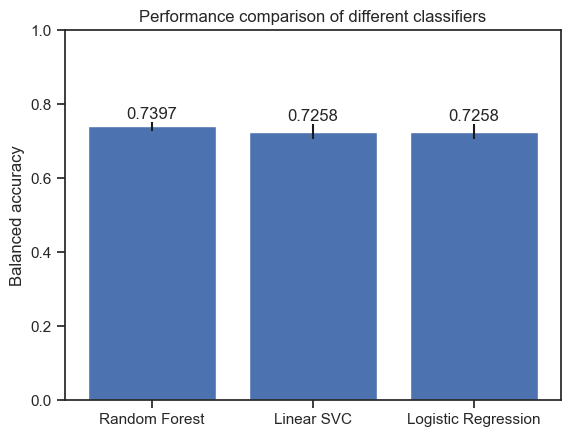

In [207]:
fig, ax = plt.subplots()

bars = ax.bar(x=["Random Forest", "Linear SVC", "Logistic Regression"], height=[np.mean(i) for i in baclist], 
              yerr=[np.std(i) for i in baclist])
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel=None, ylabel="Balanced accuracy", title="Performance comparison of different classifiers", ylim=(0.0, 1))
plt.show()

fig.savefig(fig_path + "Comparison_classifier_performance_BAC.png", bbox_inches="tight")

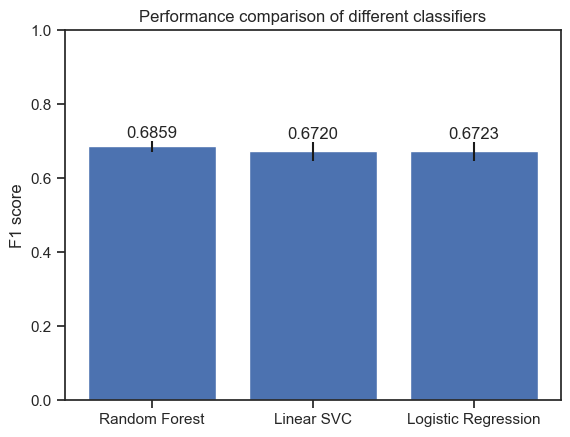

In [208]:
fig, ax = plt.subplots()

bars = ax.bar(x=["Random Forest", "Linear SVC", "Logistic Regression"], height=[np.mean(i) for i in f1list], 
    yerr=[np.std(i) for i in f1list])
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel=None, ylabel="F1 score", title="Performance comparison of different classifiers", ylim=(0.0, 1))
plt.show()

fig.savefig(fig_path + "Comparison_classifier_performance_F1.png", bbox_inches="tight")

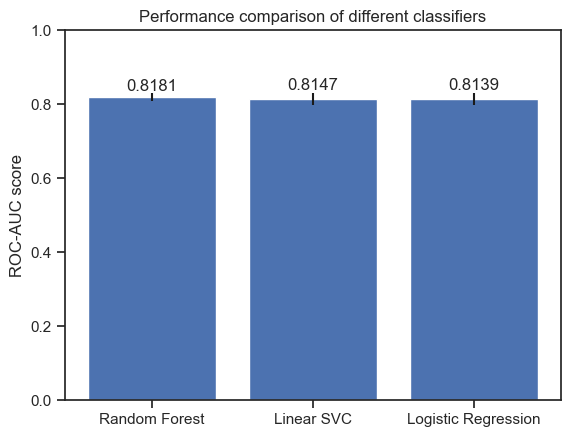

In [209]:
fig, ax = plt.subplots()

bars = ax.bar(x=["Random Forest", "Linear SVC", "Logistic Regression"], height=[np.mean(i) for i in auclist], 
    yerr=[np.std(i) for i in auclist])
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel=None, ylabel="ROC-AUC score", title="Performance comparison of different classifiers", ylim=(0.0, 1))
plt.show()

fig.savefig(fig_path + "Comparison_classifier_performance_AUC.png", bbox_inches="tight")

## Hyperparameter tuning

In [210]:
# preprocessing data 
X_train_bal, X_test_scal, y_train_bal, y_test, scaler = preprocess(X, y)

In [211]:
# save the scaler
with open(os.getcwd() + "/Models/Standard_scaler.pkl", "wb") as f:  
    pickle.dump(scaler, f)

### Linear SVC (L2 regularization)

In [212]:
parameters = {"C":[0.01, 0.1, 1, 10]}
svc_l2 = LinearSVC(penalty="l2", dual=False, random_state=0)
grs_svc_l2 = GridSearchCV(svc_l2, parameters, cv=10)
grs_svc_l2.fit(X_train_bal, y_train_bal)

grid_results_svc_l2 = pd.DataFrame(grs_svc_l2.cv_results_).sort_values("param_C")
grid_results_svc_l2.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.045676,0.005735,0.002409,0.003680,0.1,{'C': 0.1},0.73750,0.74375,0.735849,0.742138,0.729560,0.729560,0.672956,0.773585,0.685535,0.723270,0.727370,0.027449,1
3,0.079608,0.012683,0.003929,0.006319,10,{'C': 10},0.74375,0.74375,0.735849,0.748428,0.729560,0.723270,0.685535,0.754717,0.672956,0.735849,0.727366,0.025699,2
2,0.063307,0.009804,0.003637,0.006186,1,{'C': 1},0.73750,0.73750,0.735849,0.742138,0.735849,0.723270,0.685535,0.754717,0.672956,0.723270,0.724858,0.024488,3
0,0.029433,0.003165,0.001599,0.003198,0.01,{'C': 0.01},0.73125,0.71875,0.729560,0.723270,0.710692,0.742138,0.666667,0.754717,0.698113,0.723270,0.719843,0.023122,4


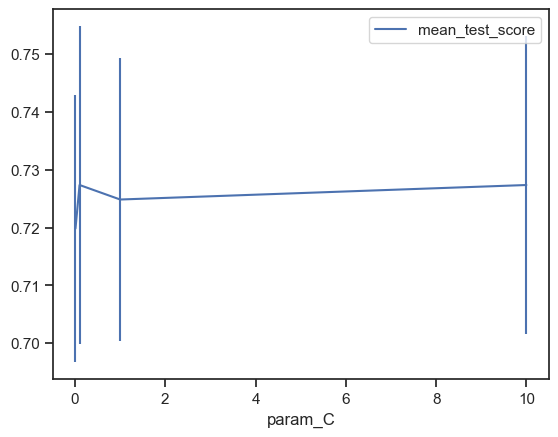

In [213]:
grid_results_svc_l2.plot(x="param_C", y="mean_test_score", yerr="std_test_score")
plt.show()

### Linear SVC (L1 regularization)

In [214]:
parameters = {"C":[0.01, 0.1, 1, 10]}
svc_l1 = LinearSVC(penalty="l1", max_iter=10000, dual=False, random_state=0)
grs_svc_l1 = GridSearchCV(svc_l1, parameters, cv=10)
grs_svc_l1.fit(X_train_bal, y_train_bal)

grid_results_svc_l1 = pd.DataFrame(grs_svc_l1.cv_results_).sort_values("param_C")
grid_results_svc_l1.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,1.847270,0.202299,0.002363,0.005024,10,{'C': 10},0.74375,0.74375,0.735849,0.748428,0.729560,0.723270,0.685535,0.754717,0.672956,0.735849,0.727366,0.025699,1
2,1.126378,0.149565,0.003921,0.006299,1,{'C': 1},0.73750,0.74375,0.735849,0.742138,0.729560,0.723270,0.685535,0.748428,0.679245,0.716981,0.724226,0.022806,2
0,0.031056,0.002607,0.005533,0.006998,0.01,{'C': 0.01},0.75000,0.72500,0.704403,0.754717,0.679245,0.716981,0.679245,0.742138,0.735849,0.735849,0.722343,0.025772,3
1,0.118454,0.035047,0.004349,0.006175,0.1,{'C': 0.1},0.71875,0.72500,0.735849,0.710692,0.710692,0.729560,0.672956,0.779874,0.685535,0.723270,0.719218,0.027446,4


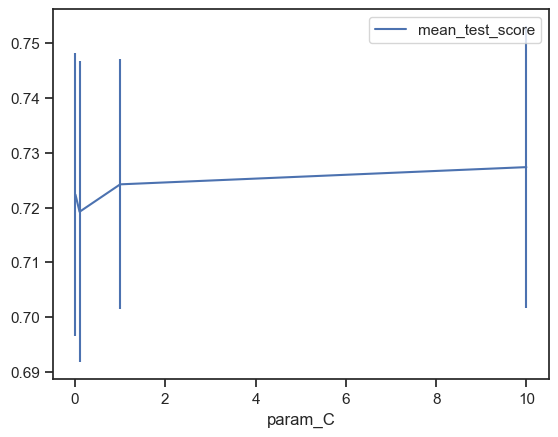

In [215]:
grid_results_svc_l1.plot(x="param_C", y="mean_test_score", yerr="std_test_score")
plt.show()

### Logistic Regression (L2 regularization)

In [216]:
parameters = {"C":[0.01, 0.1, 1, 10]}
lr_l2 = LogisticRegression(penalty="l2", max_iter=1000, dual=False, random_state=0)
grs_lr_l2 = GridSearchCV(lr_l2, parameters, cv=10, scoring="balanced_accuracy")
grs_lr_l2.fit(X_train_bal, y_train_bal)

grid_results_lr_l2 = pd.DataFrame(grs_lr_l2.cv_results_).sort_values("param_C")
grid_results_lr_l2.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.078549,0.010205,0.002424,0.005095,1,{'C': 1},0.74375,0.74375,0.742009,0.748655,0.723418,0.717009,0.666693,0.767326,0.685206,0.710839,0.724866,0.029315,1
3,0.170150,0.016656,0.004565,0.006205,10,{'C': 10},0.74375,0.73750,0.742009,0.754905,0.717326,0.710759,0.666535,0.754747,0.678956,0.723418,0.722991,0.028876,2
1,0.041492,0.007005,0.004687,0.007160,0.1,{'C': 0.1},0.72500,0.71875,0.716693,0.729826,0.710918,0.735839,0.673101,0.760918,0.710443,0.729589,0.721108,0.021242,3
0,0.024381,0.007075,0.002802,0.004989,0.01,{'C': 0.01},0.70000,0.73125,0.653797,0.685839,0.691930,0.735759,0.679430,0.742168,0.723180,0.742405,0.708576,0.029081,4


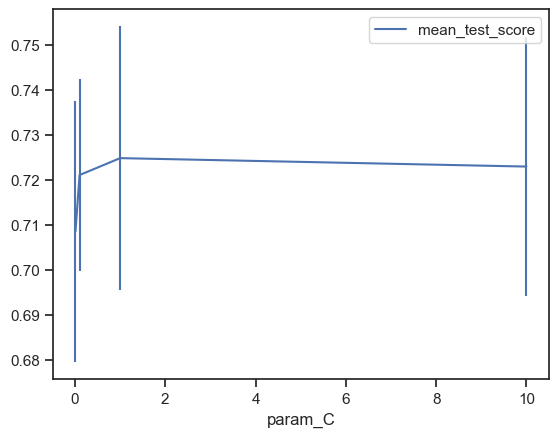

In [217]:
grid_results_lr_l2.plot(x="param_C", y="mean_test_score", yerr="std_test_score")
plt.show()

### Logistic Regression (L1 regularization)

In [218]:
parameters = {"C":[0.01, 0.1, 1, 10]}
lr_l1 = LogisticRegression(penalty="l1", solver="saga", max_iter=10000, dual=False, random_state=0)
grs_lr_l1 = GridSearchCV(lr_l1, parameters, cv=10, scoring="balanced_accuracy")
grs_lr_l1.fit(X_train_bal, y_train_bal)

grid_results_lr_l1 = pd.DataFrame(grs_lr_l1.cv_results_).sort_values("param_C")
grid_results_lr_l1.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,9.986262,1.412072,0.004066,0.006236,10,{'C': 10},0.74375,0.73750,0.742009,0.754905,0.723576,0.710759,0.666535,0.754747,0.672627,0.723418,0.722983,0.029840,1
1,0.395239,0.092735,0.003922,0.006310,0.1,{'C': 0.1},0.75000,0.71875,0.704035,0.748655,0.685759,0.735839,0.679351,0.754589,0.716851,0.717247,0.721108,0.025010,2
2,3.173891,1.009477,0.001563,0.004690,1,{'C': 1},0.73750,0.73125,0.742009,0.736076,0.717168,0.704351,0.660443,0.767326,0.672627,0.717089,0.718584,0.030738,3
0,0.049460,0.008812,0.007819,0.007096,0.01,{'C': 0.01},0.53750,0.66250,0.571994,0.641614,0.578244,0.628877,0.604114,0.654589,0.616851,0.597706,0.609399,0.037468,4


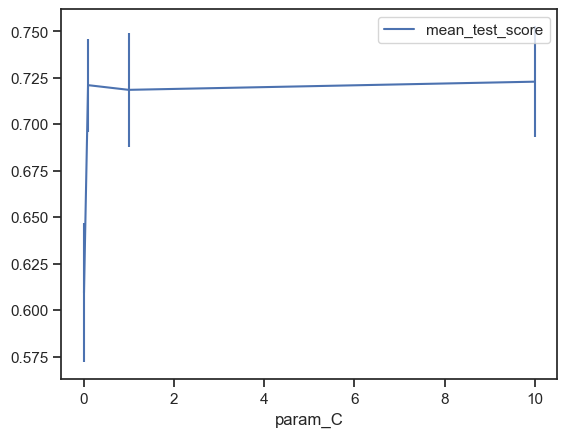

In [219]:
grid_results_lr_l1.plot(x="param_C", y="mean_test_score", yerr="std_test_score")
plt.show()

## Regularization parameter C

In [72]:
def test_regularization(X, y, C_vals = [0.01, 0.1, 0.5, 1, 5], model="LogisticRegression"):
    """
    """
    
    # create empty dictionaries to save results to
    bac_all = {}
    feature_num_all = {} 
    
    bac_l2 = []
    feature_num_l2 = []
    
    bac_none = []
    feature_num_none = []

    # calculate accuracy and feature number for L1 regularized models
    for n, C in enumerate(C_vals):
        
        bac = []
        feature_num = []
        
        for i in range(10):

            X_train_bal, X_test_scal, y_train_bal, y_test, scaler = preprocess(X, y, random_state=i)
            if model == "LogisticRegression":
                clf_l1 = LogisticRegression(penalty="l1", solver="saga", C=C, max_iter=10000, dual=False, random_state=0)
            elif model == "LinearSVC":
                clf_l1 = LinearSVC(penalty="l1", C=C, max_iter=10000, dual=False, random_state=0)  
            else:
                return "Please choose LogisticRegression or LinearSVC as a model."
            
            clf_l1.fit(X_train_bal, y_train_bal)
            y_pred_l1 = clf_l1.predict(X_test_scal)
            
            # add results to list
            bac.append(balanced_accuracy_score(y_test, y_pred_l1))
            feature_num.append(sum((clf_l1.coef_[0] != 0)))
            
            # after last C value calculate accuracy and feature number for L2 & non-regularized models
            if n == (len(C_vals)-1):

                if model == "LogisticRegression":
                    clf_l2 = LogisticRegression(penalty="l2", C=0.1, max_iter=10000, dual=False, random_state=0)
                    clf_none = LogisticRegression(penalty="none", max_iter=10000, dual=False, random_state=0)
                elif model == "LinearSVC":
                    clf_l2 = LinearSVC(penalty="l2", C=0.1, max_iter=10000, dual=False, random_state=0)
#                     clf_none = LinearSVC(penalty="none", max_iter=10000, dual=False, random_state=0)
                else:
                    return "Please choose LogisticRegression or LinearSVC as a model."
            
                # L2 regularized models
                clf_l2.fit(X_train_bal, y_train_bal)
                y_pred_l2 = clf_l2.predict(X_test_scal)

                feature_num_l2.append(sum((clf_l2.coef_[0] != 0)))
                bac_l2.append(balanced_accuracy_score(y_test, y_pred_l2))            
                
                if model == "LogisticRegression":
                    # unregularized models
                    clf_none.fit(X_train_bal, y_train_bal)
                    y_pred_none = clf_none.predict(X_test_scal)

                    feature_num_none.append(sum((clf_none.coef_[0] != 0)))
                    bac_none.append(balanced_accuracy_score(y_test, y_pred_none))  
        
        # add results to dictionaries
        bac_all[C] = bac
        feature_num_all[C] = feature_num   
        
        if n == (len(C_vals)-1):
            bac_all["L2"] = bac_l2          
            feature_num_all["L2"] = feature_num_l2
            if model == "LogisticRegression":
                bac_all["None"] = bac_none          
                feature_num_all["None"] = feature_num_none
        
    return bac_all, feature_num_all

In [63]:
C_vals = [0.01, 0.1, 0.5, 1, 5]
bac_all_lr, feature_num_all_lr = test_regularization(X, y, C_vals=C_vals, model="LogisticRegression")

In [70]:
# p-values for accuracy of L2 regularized model vs. L1 regularized models
p_vals = []

for C in C_vals + ["L2"]:
    _, p = ttest_ind(bac_all_lr["None"], bac_all_lr[C])
    p_vals.append(p)
    print("C:", C, "   p-value:", print_p_val(p))

C: 0.01    p-value: < 0.0001
C: 0.1    p-value: 0.6870
C: 0.5    p-value: 0.8948
C: 1    p-value: 0.8512
C: 5    p-value: 0.8445
C: L2    p-value: 0.6386


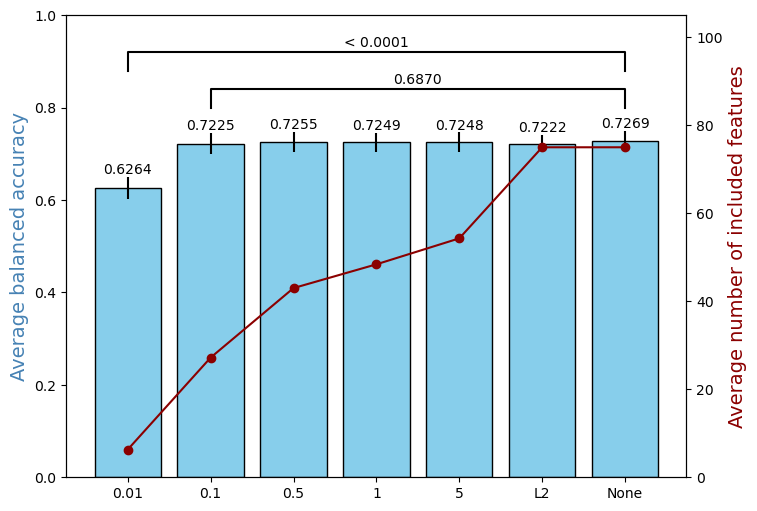

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

bars = plt.bar(x=[str(i) for i in bac_all_lr.keys()], height=[np.mean(bac) for bac in bac_all_lr.values()], 
        yerr=[np.std(bac) for bac in bac_all_lr.values()], color=["skyblue"], edgecolor="black")
ax.bar_label(bars, fmt="%.4f")

# add p-value annotations
r, h = 0.8, 0.04
ax.plot([1, 1, 6, 6], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(3.5, r+0.045, print_p_val(p_vals[1]), ha="center", va="bottom", color="black")
r, h = 0.88, 0.04
ax.plot([0, 0, 6, 6], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(3, r+0.045, print_p_val(p_vals[0]), ha="center", va="bottom", color="black")

ax.set(ylim=(0,1))
ax.set_ylabel("Average balanced accuracy", color="steelblue", fontsize=14)

ax2=ax.twinx() # two y-axes in same plot
ax2.set(ylim=(0,105))
# make a plot with different y-axis using second axis object
ax2.plot([str(i) for i in bac_all_lr.keys()], [np.mean(f) for f in feature_num_all_lr.values()], color="darkred", marker="o")
ax2.set_ylabel("Average number of included features", color="darkred", fontsize=14)

plt.show()
fig.savefig(fig_path + "Logistic_classifier_regularized_BAC.png", bbox_inches="tight", dpi=300)

In [73]:
bac_all_svc, feature_num_all_svc = test_regularization(X, y, C_vals=C_vals, model="LinearSVC")

C:\Users\kathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
# p-values for accuracy of L2 regularized model vs. L1 regularized models
p_vals = []

for C in C_vals:
    _, p = ttest_ind(bac_all_svc["L2"], bac_all_svc[C])
    p_vals.append(p)
    print("C:", C, "   p-value:", print_p_val(p))

C: 0.01    p-value: 0.2757
C: 0.1    p-value: 0.8941
C: 0.5    p-value: 0.9555
C: 1    p-value: 0.8863
C: 5    p-value: 0.9539


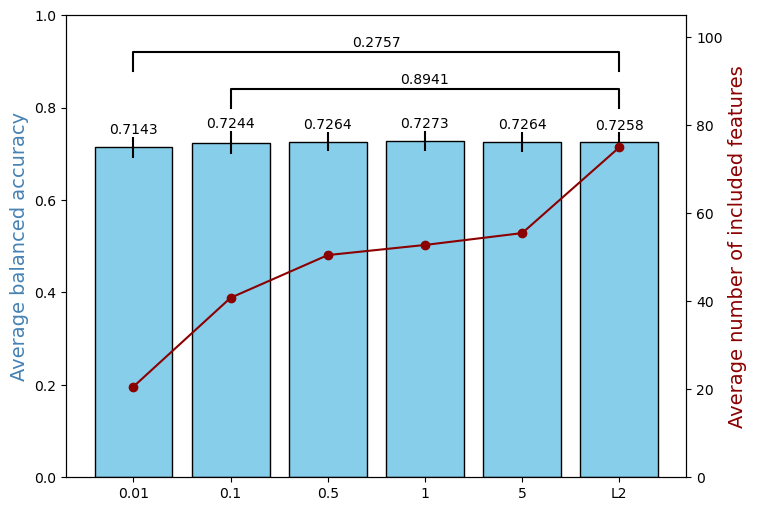

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

bars = plt.bar(x=[str(i) for i in bac_all_svc.keys()], height=[np.mean(bac) for bac in bac_all_svc.values()], 
        yerr=[np.std(bac) for bac in bac_all_svc.values()], color=["skyblue"], edgecolor="black")
ax.bar_label(bars, fmt="%.4f")

# add p-value annotations
r, h = 0.8, 0.04
ax.plot([1, 1, 5, 5], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(3, r+0.045, print_p_val(p_vals[1]), ha="center", va="bottom", color="black")
r, h = 0.88, 0.04
ax.plot([0, 0, 5, 5], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(2.5, r+0.045, print_p_val(p_vals[0]), ha="center", va="bottom", color="black")

ax.set(ylim=(0,1))
ax.set_ylabel("Average balanced accuracy", color="steelblue", fontsize=14)

ax2=ax.twinx() # two y-axes in same plot
ax2.set(ylim=(0,105))
# make a plot with different y-axis using second axis object
ax2.plot([str(i) for i in bac_all_svc.keys()], [np.mean(f) for f in feature_num_all_svc.values()], color="darkred", marker="o")
ax2.set_ylabel("Average number of included features", color="darkred", fontsize=14)

plt.show()
fig.savefig(fig_path + "Linear_SVC_regularized_BAC.png", bbox_inches="tight", dpi=300)

## Final models & feature importance

In [87]:
X_train_bal, X_test_scal, y_train_bal, y_test, scaler = preprocess(X, y)

### Random Forest

In [88]:
# train RF
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train_bal, y_train_bal)

# predict on test set
y_pred_rf = rf.predict(X_test_scal)
y_score_rf = rf.predict_proba(X_test_scal)

In [89]:
coef_rf = pd.Series(index=X_train_bal.columns, data=rf.feature_importances_, name="RF")
print("Number of features used:", len(coef_rf[coef_rf != 0]))
coef_rf.sort_values(ascending=False, key=abs)[:20]

Number of features used: 75


Signal peptide       0.035524
Helix_NSP            0.034382
Sheet_NSP            0.028552
Length               0.027555
Molecular weight     0.027443
Hydrophobic          0.025509
Solubility           0.024371
Exposed              0.023877
ExpAA                0.023536
Nucleus              0.023048
C                    0.022196
H                    0.021364
L                    0.020812
D                    0.020638
Polarity_low         0.020339
G                    0.020169
Isoelectric point    0.019236
Instability index    0.019069
V                    0.018961
F                    0.018608
Name: RF, dtype: float64

### Linear SVC (L2 regularization)

In [90]:
# train SVC , penalty = l2
svc_l2 = LinearSVC(C=0.1, max_iter=10000, dual=False, random_state=0)
svc_l2.fit(X_train_bal, y_train_bal)

# predict on test set
y_pred_svc_l2 = svc_l2.predict(X_test_scal)
y_score_svc_l2 = svc_l2.decision_function(X_test_scal)

In [91]:
coef_svc_l2 = pd.Series(index=X_train_bal.columns, data=svc_l2.coef_[0], name="SVC_L2")
print("Number of features used:", len(coef_svc_l2[coef_svc_l2 != 0]))
coef_svc_l2.sort_values(ascending=False, key=abs)[:20]

Number of features used: 75


Nucleus            -0.488631
Golgi_apparatus     0.488487
Signal peptide      0.487889
Peroxisome         -0.459735
PS00028            -0.311474
PS00027            -0.294323
PS00237            -0.288521
ExpAA               0.265784
DNA_binding        -0.225073
Length              0.220055
RNA_binding        -0.209541
PredHel_binary      0.206619
PredHel            -0.199353
PS00022             0.199341
Extracellular       0.188602
PS01186             0.188112
GPI-anchor          0.147714
W                  -0.137909
GlycoMine_O         0.133011
Molecular weight   -0.116996
Name: SVC_L2, dtype: float64

### Linear SVC (L1 regularization)

In [92]:
# train SVC , penalty = l1
svc_l1 = LinearSVC(penalty="l1", C=0.1, max_iter=10000, dual=False, random_state=0)
svc_l1.fit(X_train_bal, y_train_bal)

# predict on test set
y_pred_svc_l1 = svc_l1.predict(X_test_scal)
y_score_svc_l1 = svc_l1.decision_function(X_test_scal)

In [93]:
coef_svc_l1 = pd.Series(index=X_train_bal.columns, data=svc_l1.coef_[0], name="SVC_L1")
print("Number of features used:", len(coef_svc_l1[coef_svc_l1 != 0]))
coef_svc_l1[coef_svc_l1 != 0].sort_values(ascending=False, key=abs)[:44]

Number of features used: 44


Signal peptide        0.534828
Nucleus              -0.532714
Golgi_apparatus       0.427402
DNA_binding          -0.200827
Hydrophobic          -0.168082
PredHel_binary        0.161340
PS00237              -0.157404
K                     0.138493
W                    -0.120741
RNA_binding          -0.116632
Length                0.102979
N                     0.101273
PS00022               0.100566
S                    -0.100102
Extracellular         0.098763
GlycoMine_O           0.094861
Polarizability_low    0.073642
G                     0.072739
L                    -0.071506
ExpAA                 0.066607
Sheet_NSP             0.064415
PS00027              -0.061534
V                     0.060945
Isoelectric point    -0.059583
Disorder_NSP         -0.049963
H                    -0.048301
Instability index     0.046851
PS00028              -0.039562
A                     0.034487
D                     0.031059
F                    -0.029804
GPI-anchor            0.022941
Cytoplas

In [94]:
print("Number of ignored features:", len(coef_svc_l1[coef_svc_l1 == 0]))
coef_svc_l1[coef_svc_l1 == 0]

Number of ignored features: 31


Molecular weight         0.0
P                        0.0
R                        0.0
T                        0.0
Y                        0.0
Polar                    0.0
Neutral                  0.0
Volume_small             0.0
Volume_medium            0.0
Volume_large             0.0
Polarity_medium          0.0
Polarity_large           0.0
Polarizability_medium    0.0
Polarizability_large     0.0
Charge_positive          0.0
Charge_neutral           0.0
Charge_negative          0.0
Buried                   0.0
Exposed                  0.0
Intermediate             0.0
Turn_NSP                 0.0
Solubility               0.0
PredHel                  0.0
Lysosome/Vacuole         0.0
Cell_membrane            0.0
Endoplasmic_reticulum    0.0
Mitochondrion            0.0
Peroxisome               0.0
Plastid                  0.0
PS00232                  0.0
GlycoMine_C              0.0
Name: SVC_L1, dtype: float64

### Logistic Regression (L2 regularization)

In [95]:
# train logistic classifier, penalty = l2
lr_l2 = LogisticRegression(penalty="l2", C=1, max_iter=1000, dual=False, random_state=0)
lr_l2.fit(X_train_bal, y_train_bal)

# predict on test set
y_pred_lr_l2 = lr_l2.predict(X_test_scal)
y_score_lr_l2 = lr_l2.decision_function(X_test_scal)

In [96]:
# save the model 
with open(os.getcwd() + "/Models/LogisticClassifier_L2.pkl", "wb") as f:  
    pickle.dump(lr_l2, f)

In [97]:
coef_lr_l2 = pd.Series(index=X_train_bal.columns, data=lr_l2.coef_[0], name="LR_L2")
print("Number of features used:", len(coef_lr_l2[coef_lr_l2 != 0]))
coef_lr_l2.sort_values(ascending=False, key=abs)[:20]

Number of features used: 75


Signal peptide     1.323471
Golgi_apparatus    1.242441
Nucleus           -1.155872
Peroxisome        -1.122096
PS00027           -0.934806
PS00028           -0.916317
PS00237           -0.831567
PS00022            0.729107
ExpAA              0.686579
DNA_binding       -0.675055
PS01186            0.637578
PredHel_binary     0.558930
Length             0.557275
PS00232            0.526010
RNA_binding       -0.524253
PredHel           -0.515300
Extracellular      0.498255
GPI-anchor         0.364953
W                 -0.360776
GlycoMine_O        0.350940
Name: LR_L2, dtype: float64

### Logistic Regression (L1 regularization)

In [98]:
# train logistic classifier, penalty = l1
lr_l1 = LogisticRegression(penalty="l1", solver="saga", C=0.1, max_iter=10000, dual=False, random_state=0)
lr_l1.fit(X_train_bal, y_train_bal)

# predict on test set
y_pred_lr_l1 = lr_l1.predict(X_test_scal)
y_score_lr_l1 = lr_l1.decision_function(X_test_scal)

In [99]:
# save the model 
with open(os.getcwd() + "/Models/LogisticClassifier_L1.pkl", "wb") as f:  
    pickle.dump(lr_l1, f)

In [100]:
coef_lr_l1 = pd.Series(index=X_train_bal.columns, data=lr_l1.coef_[0], name="LR_L1")
print("Number of features used:", len(coef_lr_l1[coef_lr_l1 != 0]))
coef_lr_l1.sort_values(ascending=False, key=abs)[:25]

Number of features used: 25


Signal peptide        1.289156
Nucleus              -1.197541
PredHel_binary        0.390763
Hydrophobic          -0.324316
Length                0.258947
W                    -0.256808
Sheet_NSP             0.223946
S                    -0.212108
L                    -0.187705
Polarizability_low    0.183402
N                     0.167283
Golgi_apparatus       0.156507
K                     0.152344
H                    -0.135852
Exposed               0.118160
DNA_binding          -0.115168
G                     0.107808
V                     0.091059
ExpAA                 0.074645
Isoelectric point    -0.074296
F                    -0.072594
GlycoMine_O           0.047145
Intermediate         -0.045781
D                     0.041030
First60ExpAA          0.038551
Name: LR_L1, dtype: float64

In [101]:
print("Number of ignored features:", len(coef_lr_l1[coef_lr_l1 == 0]))
coef_lr_l1[coef_lr_l1 == 0]

Number of ignored features: 50


Molecular weight         0.0
A                        0.0
C                        0.0
E                        0.0
I                        0.0
M                        0.0
P                        0.0
Q                        0.0
R                        0.0
T                        0.0
Y                        0.0
Instability index        0.0
Polar                    0.0
Neutral                  0.0
Volume_small             0.0
Volume_medium            0.0
Volume_large             0.0
Polarity_low             0.0
Polarity_medium          0.0
Polarity_large           0.0
Polarizability_medium    0.0
Polarizability_large     0.0
Charge_positive          0.0
Charge_neutral           0.0
Charge_negative          0.0
Buried                   0.0
Disorder_NSP             0.0
Helix_NSP                0.0
Turn_NSP                 0.0
Solubility               0.0
PredHel                  0.0
Cytoplasm                0.0
Extracellular            0.0
Lysosome/Vacuole         0.0
Cell_membrane 

## Model evaluation

In [102]:
models = [rf, svc_l2, svc_l1, lr_l2, lr_l1]
model_names = ["Random Forest", "SVC (L2)", "SVC (L1)", "Logistic Classifier (L2)", "Logistic Classifier (L1)"]

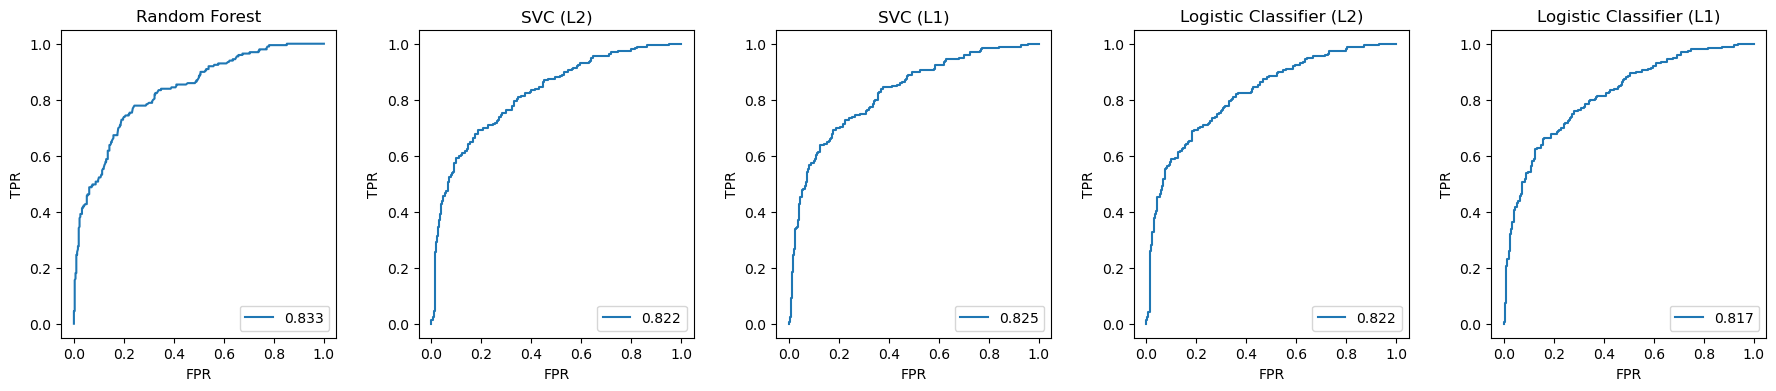

In [103]:
fig, ax = plt.subplots(1, len(models), figsize=(22, 4))
fig.subplots_adjust(wspace=0.3)

for i in range(len(models)):
    RocCurveDisplay.from_estimator(models[i], X_test_scal, y_test, ax=ax[i])
    ax[i].set(xlabel="FPR", ylabel="TPR", title=model_names[i])
#     ax[i].legend(labels=[round(roc_auc_score(y_test, models[i].decision_function(X_test_scal)), 3)], loc="lower right")
    try:
        ax[i].legend(labels=[round(roc_auc_score(y_test, models[i].predict_proba(X_test_scal)[:, 1]), 3)], loc="lower right")
    except:
        ax[i].legend(labels=[round(roc_auc_score(y_test, models[i].decision_function(X_test_scal)), 3)], loc="lower right")

plt.show()
fig.savefig(fig_path + "Final_models_AUC_ROC_curve.png", bbox_inches="tight")

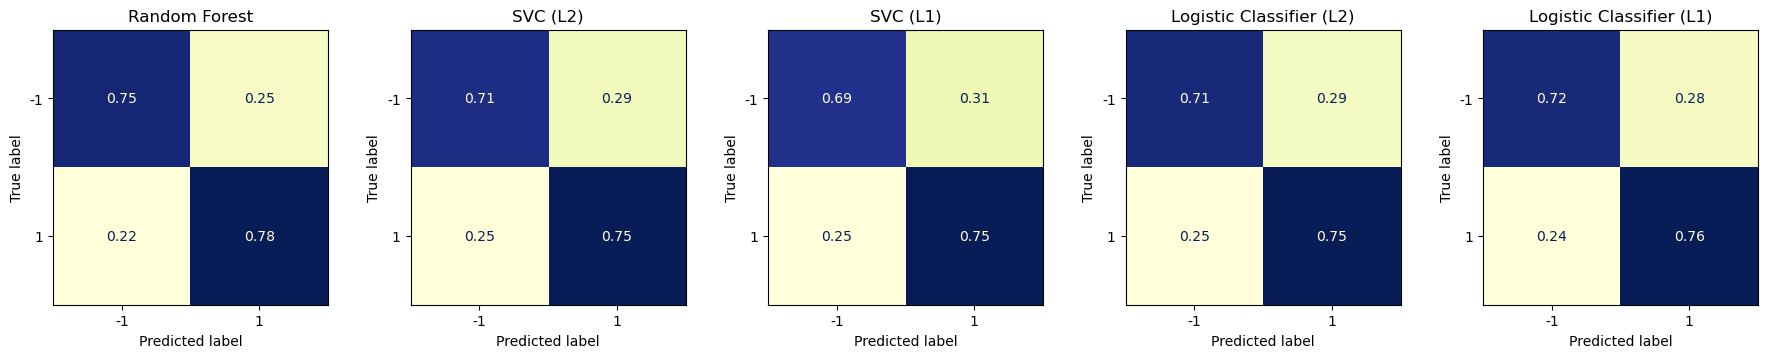

In [104]:
fig, ax = plt.subplots(1, 5, figsize=(22, 4))
fig.subplots_adjust(wspace=0.3)

for i in range(5):
    ConfusionMatrixDisplay.from_estimator(models[i], X_test_scal, y_test, normalize="true", colorbar=False, cmap="YlGnBu", 
        ax=ax[i])
    ax[i].set(title=model_names[i])

plt.show()
fig.savefig(fig_path + "Final_models_confusion_matrix.png", bbox_inches="tight")

## Feature importance

In [105]:
rank_rf = abs(coef_rf).rank().sort_values()
rank_svc_l2 = abs(coef_svc_l2).rank().sort_values()
rank_svc_l1 = abs(coef_svc_l1[coef_svc_l1 != 0]).rank().sort_values()
rank_lr_l2 = abs(coef_lr_l2).rank().sort_values()
rank_lr_l1 = abs(coef_lr_l1[coef_lr_l1 != 0]).rank().sort_values()

In [106]:
all_ranks = pd.merge(rank_rf, rank_svc_l2, left_index=True, right_index=True, how="outer")
all_ranks = pd.merge(all_ranks, rank_svc_l1, left_index=True, right_index=True, how="outer")
all_ranks = pd.merge(all_ranks, rank_lr_l2, left_index=True, right_index=True, how="outer")
all_ranks = pd.merge(all_ranks, rank_lr_l1, left_index=True, right_index=True, how="outer")
all_ranks.fillna(0, inplace=True)
all_ranks["Mean"] = all_ranks.mean(axis=1)
all_ranks.sort_values("Mean", ascending=False, inplace=True)
all_ranks[:50]

,RF,SVC_L2,SVC_L1,LR_L2,LR_L1,Mean
Signal peptide,75.0,73.0,44.0,75.0,25.0,58.4
Nucleus,66.0,75.0,43.0,73.0,24.0,56.2
Length,72.0,66.0,34.0,63.0,21.0,51.2
ExpAA,67.0,68.0,25.0,67.0,7.0,46.8
W,55.0,58.0,36.0,57.0,20.0,45.2
Golgi_apparatus,16.0,74.0,42.0,74.0,14.0,44.0
Hydrophobic,70.0,43.0,40.0,42.0,22.0,43.4
PredHel_binary,21.0,64.0,39.0,64.0,23.0,42.2
N,53.0,55.0,33.0,53.0,15.0,41.8
K,52.0,54.0,37.0,52.0,13.0,41.6


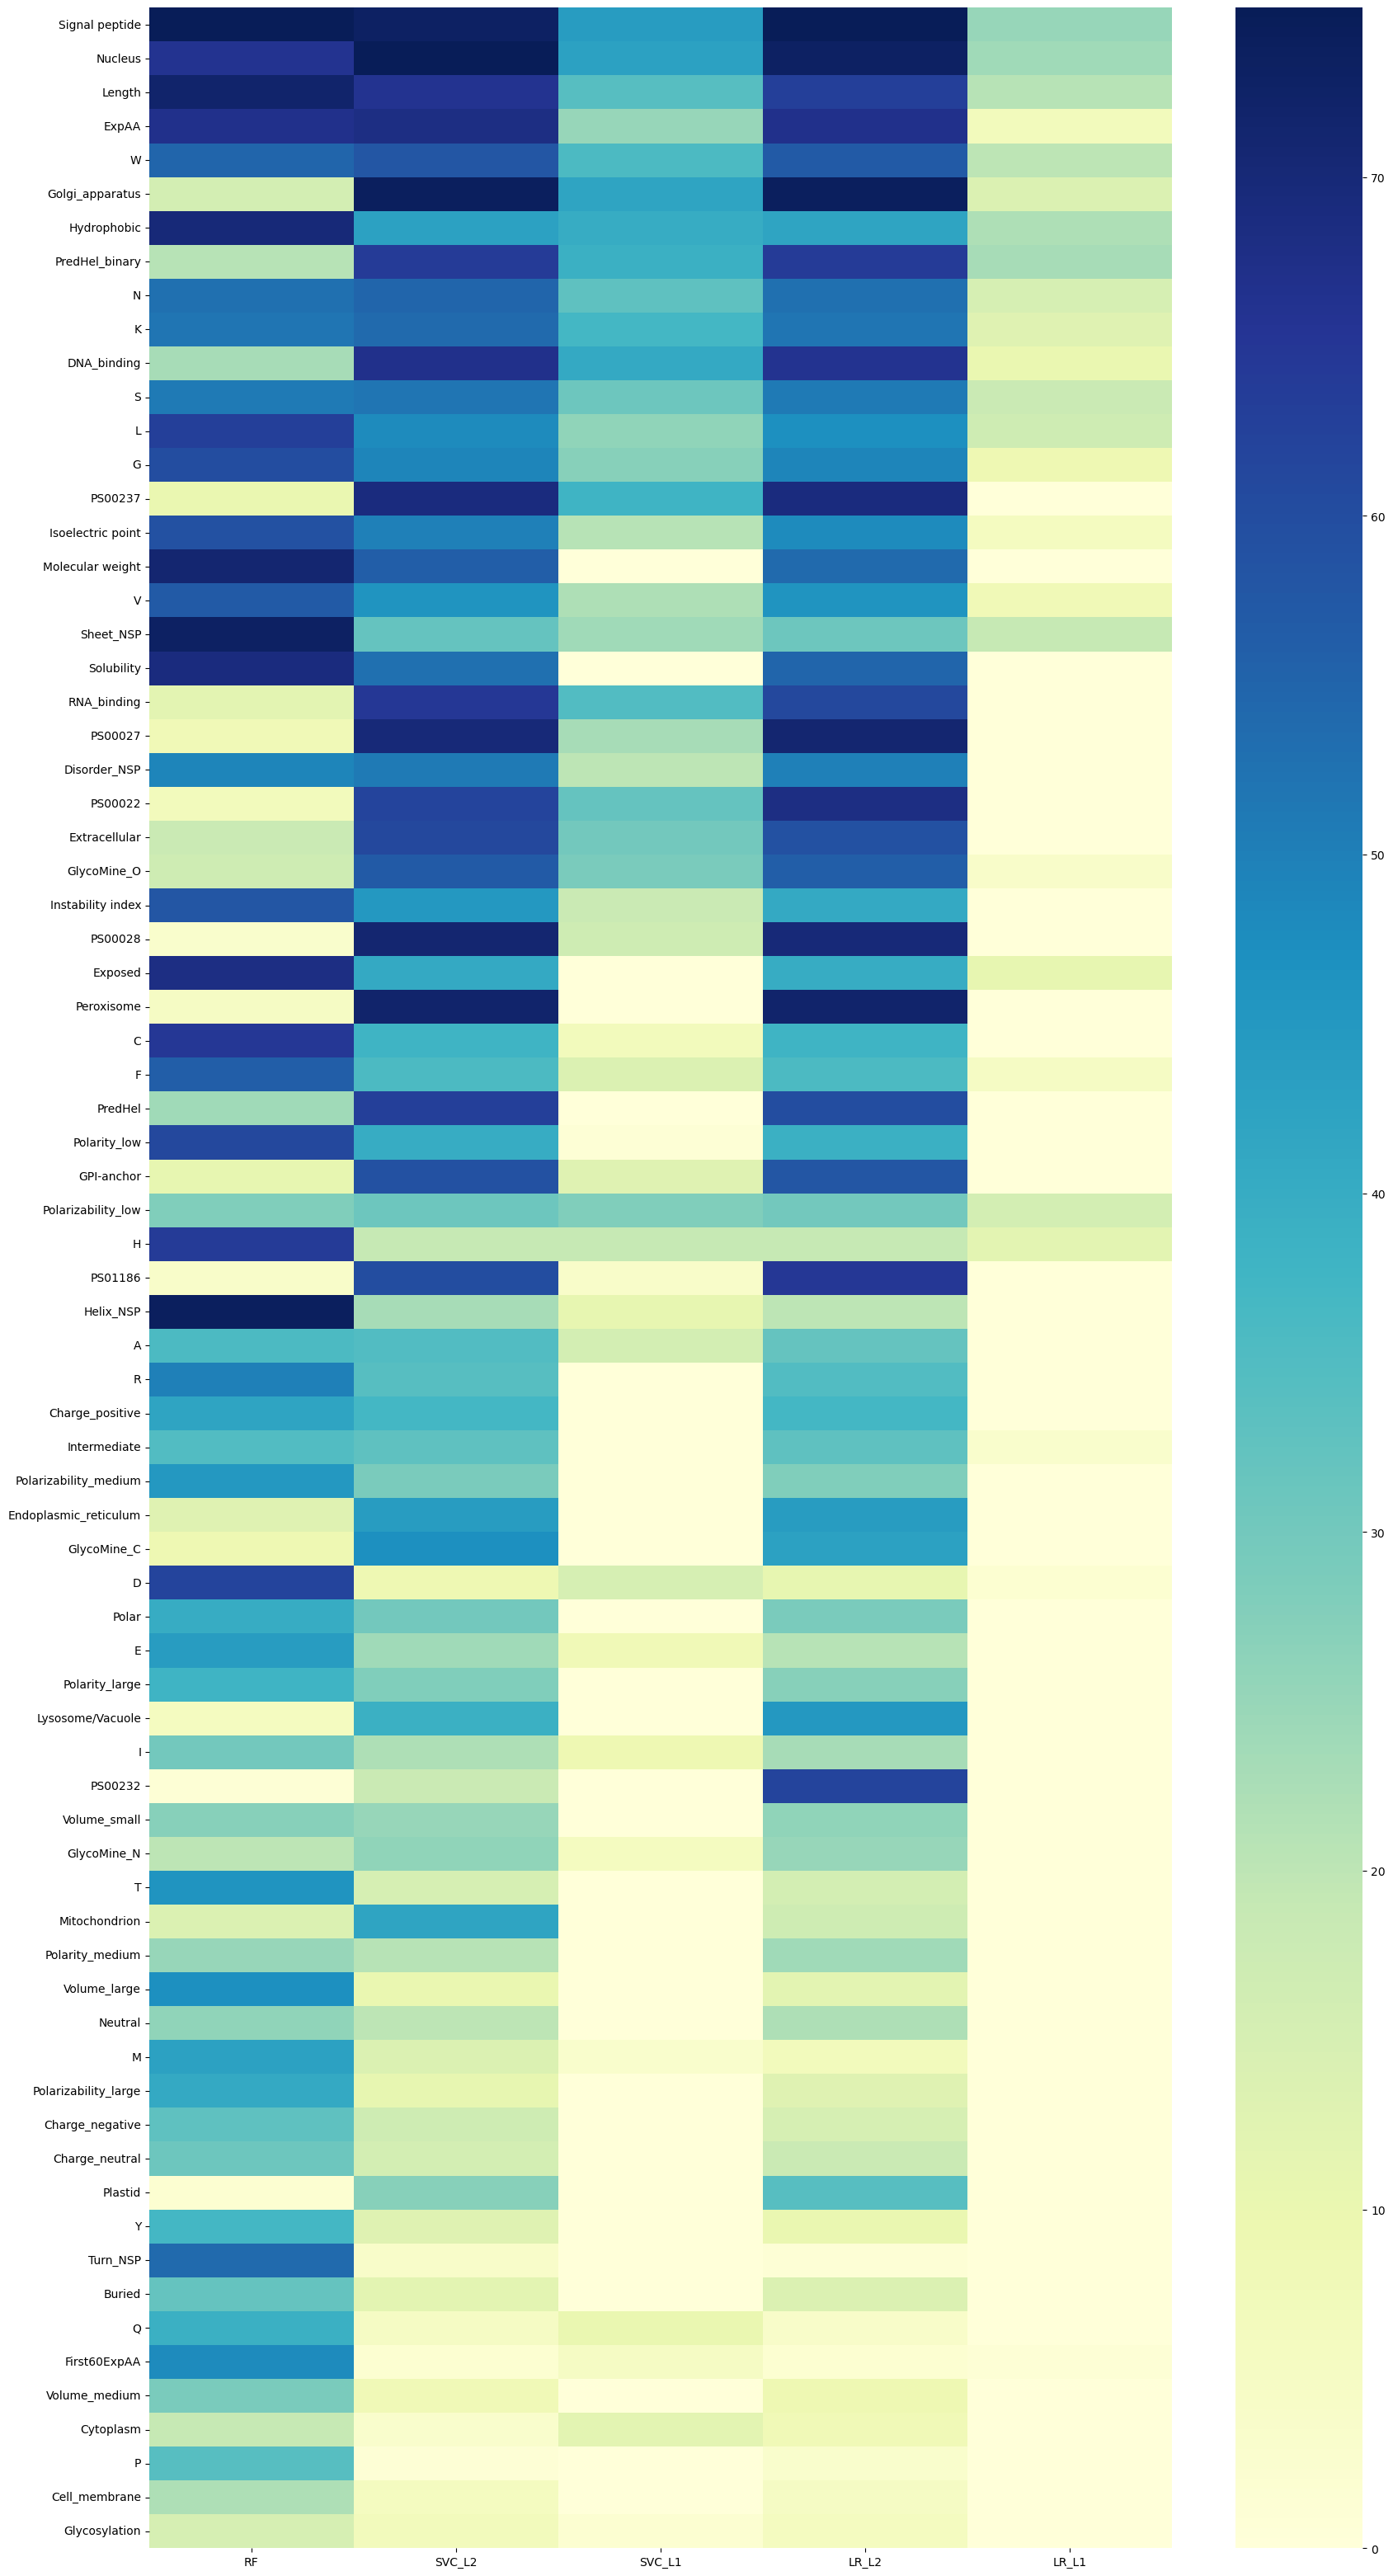

In [107]:
fig = plt.figure(figsize=(20, 40))

sns.heatmap(all_ranks[["RF", "SVC_L2", "SVC_L1", "LR_L2", "LR_L1"]], cmap="YlGnBu")

plt.show()
fig.savefig(fig_path + "Heatmap_feature_ranking.png", bbox_inches="tight")

## Dataset stringency

In [148]:
def increase_stringency_CSF(feature_df, csf_df, i):
    
    stringent_csf = csf_df[csf_df["#Studies"]>=i]["Uniprot"]
    remove_csf = set(df_features[df_features["CSF"] == 1]["Uniprot"]) - set(stringent_csf)
    df_stringent = df_features.drop(df_features[(df_features["CSF"] == 1) & (df_features["Uniprot"].isin(remove_csf))].index)
    
    print("Number of CSF proteins to be removed:", len(remove_csf))
    print("Number of CSF proteins left:", len(df_stringent[(df_stringent["CSF"] == 1)]))   
    
    return df_stringent


def increase_stringency_brain(feature_df, brain_set):

    df_stringent = feature_df[feature_df["Uniprot"].isin(brain_set)]
    print("Number of brain proteins to be removed:", len(df_features) - len(df_stringent))
    print("Number of CSF proteins left:", len(df_stringent[(df_stringent["CSF"] == 1)]))   
    print("Number of non-CSF proteins left:", len(df_stringent[(df_stringent["CSF"] == -1)])) 
    
    return df_stringent


def accuracy_stringent(df, n, model="L1"):
    
    # define explanatory and response variables
    X = (df.drop(["Uniprot", "Sequence", "CSF"], axis=1))
    y = (df["CSF"])
    
    bac = []
    auc = []
    
    for i in range(10):
        
        X_train_bal, X_test_scal, y_train_bal, y_test, scaler = preprocess(X, y, random_state=i)
        
        # train model
        if model == "L1":
            lr = LogisticRegression(penalty="l1", solver="saga", C=0.1, max_iter=10000, dual=False, 
                random_state=0).fit(X_train_bal, y_train_bal)
        if model == "L2":
            lr = LogisticRegression(penalty="l2", C=0.1, max_iter=1000, dual=False, random_state=0).fit(X_train_bal, y_train_bal)     

        y_pred = lr.predict(X_test_scal)
        
        # print(i, "Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))
        bac.append(balanced_accuracy_score(y_test, y_pred))
        auc.append(roc_auc_score(y_test, lr.decision_function(X_test_scal)))
        
        if i == 0:
            coef = pd.Series(index=X_train_bal.columns, data=lr.coef_[0], name=n)
            coef.sort_values(ascending=False, key=abs, inplace=True)

    return bac, auc, coef

### CSF proteins

In [156]:
# Sparse model (L1)

baclist_csf_l1 = []
auclist_csf_l1 = []
coefs_l1 = []

print("Number of non-CSF proteins:", len(df_features[df_features["CSF"] == -1]))

for i in range(1, csf["#Studies"].max()+1):
    print("-------------")
    print("Number of minimum CSF studies:", i)
    df_stringent = increase_stringency_CSF(df_features, csf, i)
    bac, auc, coef = accuracy_stringent(df_stringent, n=i, model="L1")

    baclist_csf_l1.append(bac)
    auclist_csf_l1.append(auc)
    coefs_l1.append(coef)

Number of non-CSF proteins: 1547
-------------
Number of minimum CSF studies: 1
Number of CSF proteins to be removed: 0
Number of CSF proteins left: 995
-------------
Number of minimum CSF studies: 2
Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
-------------
Number of minimum CSF studies: 3
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
-------------
Number of minimum CSF studies: 4
Number of CSF proteins to be removed: 521
Number of CSF proteins left: 474
-------------
Number of minimum CSF studies: 5
Number of CSF proteins to be removed: 588
Number of CSF proteins left: 407
-------------
Number of minimum CSF studies: 6
Number of CSF proteins to be removed: 693
Number of CSF proteins left: 302
-------------
Number of minimum CSF studies: 7
Number of CSF proteins to be removed: 833
Number of CSF proteins left: 162


In [183]:
#### TO DO ####
# multiple testing correction

# p-values for accuracy of models with more strignent training data
p_vals_l1 = []

for i in range(len(baclist_csf_l1)-1):
    _, p = ttest_ind(baclist_csf_l1[i], baclist_csf_l1[i+1])
    print("Comparison of %i and %i: %s" % (i+1, i+2, print_p_val(p)))
    p_vals_l1.append(p)

Comparison of 1 and 2: 0.0001
Comparison of 2 and 3: 0.0051
Comparison of 3 and 4: 0.0034
Comparison of 4 and 5: 0.5247
Comparison of 5 and 6: 0.8868
Comparison of 6 and 7: 0.2318


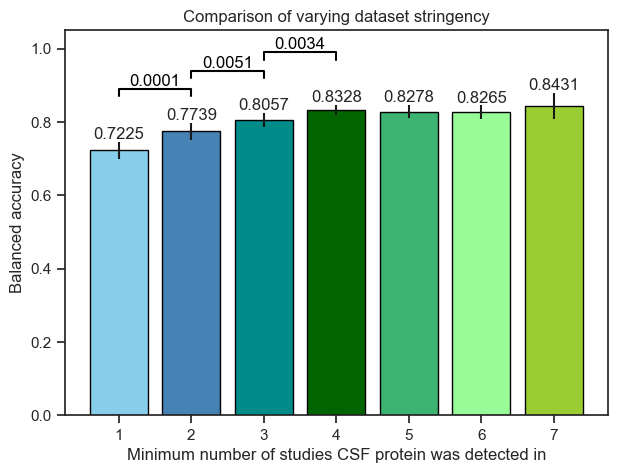

In [195]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(7,5))

bars = ax.bar(x=[1,2,3,4,5,6,7], height=[np.mean(i) for i in baclist_csf_l1], yerr=[np.std(i) for i in baclist_csf_l1], 
    color=["skyblue", "steelblue", "darkcyan", "darkgreen", "mediumseagreen", "palegreen", "yellowgreen"], edgecolor="black")
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel="Minimum number of studies CSF protein was detected in", ylabel="Balanced accuracy", 
    title="Comparison of varying dataset stringency", ylim=(0, 1.05))

# add p-value annotations
r, h = 0.87, 0.02
ax.plot([1, 1, 2, 2], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(1.5, r+0.02, print_p_val(p_vals_l1[0]), ha="center", va="bottom", color="black")
r, h = 0.92, 0.02
ax.plot([2, 2, 3, 3], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(2.5, r+0.02, print_p_val(p_vals_l1[1]), ha="center", va="bottom", color="black")
r, h = 0.97, 0.02
ax.plot([3, 3, 4, 4], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(3.5, r+0.02, print_p_val(p_vals_l1[2]), ha="center", va="bottom", color="black")

plt.show()
fig.savefig(fig_path + "Increased_dataset_stringency_CSF_BAC_L1.png", bbox_inches="tight", dpi=300)

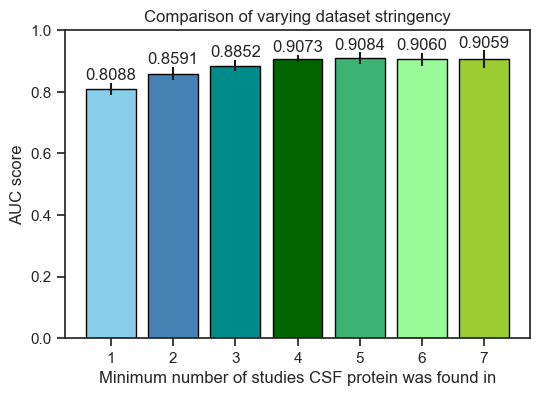

In [151]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

bars = ax.bar(x=[1,2,3,4,5,6,7], height=[np.mean(i) for i in auclist_csf], yerr=[np.std(i) for i in auclist_csf],
    color=["skyblue", "steelblue", "darkcyan", "darkgreen", "mediumseagreen", "palegreen", "yellowgreen"], edgecolor="black")
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel="Minimum number of studies CSF protein was found in", ylabel="AUC score", 
    title="Comparison of varying dataset stringency", ylim=(0, 1))
plt.show()

fig.savefig(fig_path + "Increased_dataset_stringency_CSF_AUC_L1.png", bbox_inches="tight", dpi=300)

In [176]:
# Full model (L2)

baclist_csf_l2 = []
auclist_csf_l2 = []
coefs_l2 = []

print("Number of non-CSF proteins:", len(df_features[df_features["CSF"] == -1]))

for i in range(1, csf["#Studies"].max()+1):
    print("-------------")
    print("Number of minimum CSF studies:", i)
    df_stringent = increase_stringency_CSF(df_features, csf, i)
    bac, auc, coef = accuracy_stringent(df_stringent, n=i, model="L2")

    baclist_csf_l2.append(bac)
    auclist_csf_l2.append(auc)
    coefs_l2.append(coef)

Number of non-CSF proteins: 1547
-------------
Number of minimum CSF studies: 1
Number of CSF proteins to be removed: 0
Number of CSF proteins left: 995
-------------
Number of minimum CSF studies: 2
Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
-------------
Number of minimum CSF studies: 3
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
-------------
Number of minimum CSF studies: 4
Number of CSF proteins to be removed: 521
Number of CSF proteins left: 474
-------------
Number of minimum CSF studies: 5
Number of CSF proteins to be removed: 588
Number of CSF proteins left: 407
-------------
Number of minimum CSF studies: 6
Number of CSF proteins to be removed: 693
Number of CSF proteins left: 302
-------------
Number of minimum CSF studies: 7
Number of CSF proteins to be removed: 833
Number of CSF proteins left: 162


In [178]:
#### TO DO ####
# multiple testing correction

# p-values for accuracy of models with more strignent training data
p_vals_l2 = []

for i in range(len(baclist_csf_l2)-1):
    _, p = ttest_ind(baclist_csf_l2[i], baclist_csf_l2[i+1])
    print("Comparison of %i and %i: %s" % (i+1, i+2, print_p_val(p)))
    p_vals_l2.append(p)

Comparison of 1 and 2: < 0.0001
Comparison of 2 and 3: 0.0306
Comparison of 3 and 4: 0.0038
Comparison of 4 and 5: 0.7830
Comparison of 5 and 6: 0.9623
Comparison of 6 and 7: 0.6383


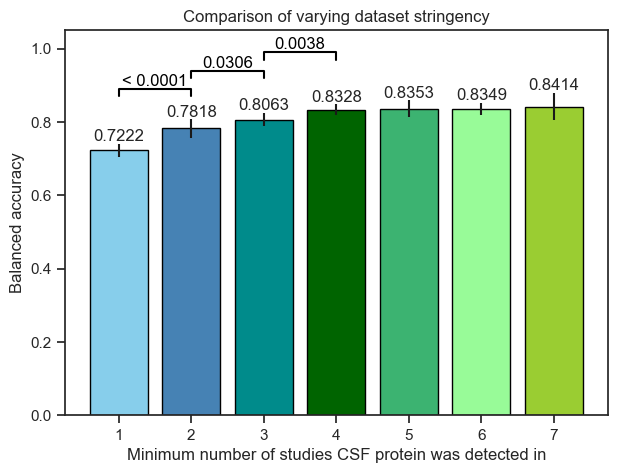

In [194]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(7,5))

bars = ax.bar(x=[1,2,3,4,5,6,7], height=[np.mean(i) for i in baclist_csf_l2], yerr=[np.std(i) for i in baclist_csf_l2], 
    color=["skyblue", "steelblue", "darkcyan", "darkgreen", "mediumseagreen", "palegreen", "yellowgreen"], edgecolor="black")
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel="Minimum number of studies CSF protein was detected in", ylabel="Balanced accuracy", 
    title="Comparison of varying dataset stringency", ylim=(0, 1.05))

# add p-value annotations
r, h = 0.87, 0.02
ax.plot([1, 1, 2, 2], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(1.5, r+0.02, print_p_val(p_vals_l2[0]), ha="center", va="bottom", color="black")
r, h = 0.92, 0.02
ax.plot([2, 2, 3, 3], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(2.5, r+0.02, print_p_val(p_vals_l2[1]), ha="center", va="bottom", color="black")
r, h = 0.97, 0.02
ax.plot([3, 3, 4, 4], [r, r+h, r+h, r], lw=1.5, color="black")
ax.text(3.5, r+0.02, print_p_val(p_vals_l2[2]), ha="center", va="bottom", color="black")

plt.show()
fig.savefig(fig_path + "Increased_dataset_stringency_CSF_BAC_L2.png", bbox_inches="tight", dpi=300)

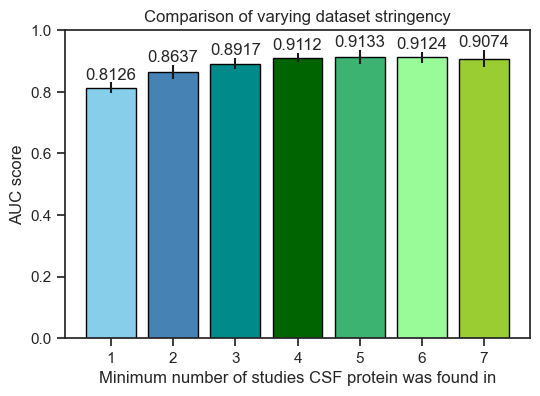

In [155]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

bars = ax.bar(x=[1,2,3,4,5,6,7], height=[np.mean(i) for i in auclist_csf], yerr=[np.std(i) for i in auclist_csf],
    color=["skyblue", "steelblue", "darkcyan", "darkgreen", "mediumseagreen", "palegreen", "yellowgreen"], edgecolor="black")
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel="Minimum number of studies CSF protein was found in", ylabel="AUC score", 
    title="Comparison of varying dataset stringency", ylim=(0, 1))
plt.show()

fig.savefig(fig_path + "Increased_dataset_stringency_CSF_AUC_L2.png", bbox_inches="tight", dpi=300)

### Brain 

In [116]:
baclist_brain = []
auclist_brain = []

brain_sets = [brain_tissue_enhanced, brain_group_enriched, brain_tissue_enriched]

print("Number of brain proteins:", len(df_features))

for i in range(len(brain_sets)):
    print("-------------")
    df_stringent = increase_stringency_brain(df_features, brain_sets[i])
    bac, auc, cm = accuracy_stringent(df_stringent, n=i)
    
    baclist_brain.append(bac)
    auclist_brain.append(auc)

Number of brain proteins: 2542
-------------
Number of brain proteins to be removed: 0
Number of CSF proteins left: 995
Number of non-CSF proteins left: 1547
-------------
Number of brain proteins to be removed: 1459
Number of CSF proteins left: 424
Number of non-CSF proteins left: 659
-------------
Number of brain proteins to be removed: 2056
Number of CSF proteins left: 201
Number of non-CSF proteins left: 285


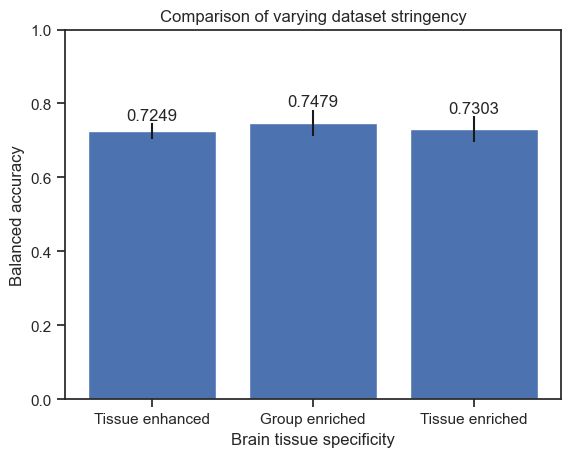

In [117]:
fig, ax = plt.subplots()

bars = ax.bar(x=["Tissue enhanced", "Group enriched", "Tissue enriched"], height=[np.mean(i) for i in baclist_brain], yerr=[np.std(i) for i in baclist_brain])
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel="Brain tissue specificity", ylabel="Balanced accuracy", 
    title="Comparison of varying dataset stringency", ylim=(0, 1))
plt.show()

fig.savefig(fig_path + "Increased_dataset_stringency_brain_specifcity_BAC.png", bbox_inches="tight")

In [118]:
baclist_brain = []
auclist_brain = []

brain_sets = [brain_all, brain_many, brain_some, brain_single]

print("Number of brain proteins:", len(df_features))

for i in range(len(brain_sets)):
    print("-------------")
    df_stringent = increase_stringency_brain(df_features, brain_sets[i])
    bac, auc, cm = accuracy_stringent(df_stringent, n=i)
    
    baclist_brain.append(bac)
    auclist_brain.append(auc)

Number of brain proteins: 2542
-------------
Number of brain proteins to be removed: 0
Number of CSF proteins left: 995
Number of non-CSF proteins left: 1547
-------------
Number of brain proteins to be removed: 331
Number of CSF proteins left: 846
Number of non-CSF proteins left: 1365
-------------
Number of brain proteins to be removed: 1382
Number of CSF proteins left: 348
Number of non-CSF proteins left: 812
-------------
Number of brain proteins to be removed: 2377
Number of CSF proteins left: 35
Number of non-CSF proteins left: 130


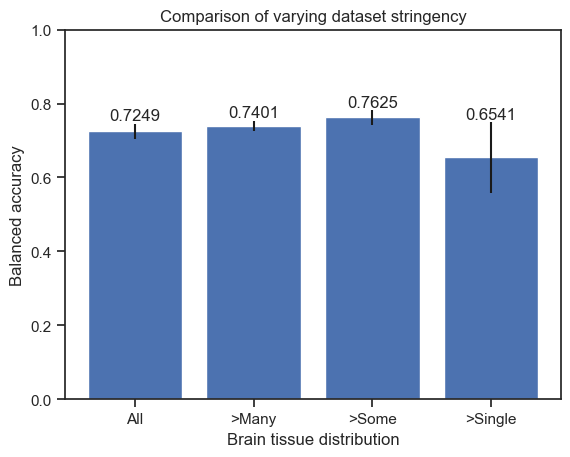

In [119]:
fig, ax = plt.subplots()

bars = ax.bar(x=["All", ">Many", ">Some", ">Single"], height=[np.mean(i) for i in baclist_brain], yerr=[np.std(i) for i in baclist_brain])
ax.bar_label(bars, fmt="%.4f")
ax.set(xlabel="Brain tissue distribution", ylabel="Balanced accuracy", 
    title="Comparison of varying dataset stringency", ylim=(0, 1))
plt.show()

fig.savefig(fig_path + "Increased_dataset_stringency_brain_distribution_BAC.png", bbox_inches="tight")

## Feature analysis of models trained on more stringent CSF data

In [120]:
def stringent_dataset_analysis(df, save_model=False, model_name=None):
    
    # define explanatory and response variables
    X = (df.drop(["Uniprot", "Sequence", "CSF"], axis=1))
    y = (df["CSF"])
    
    coefs = []
    
    for i in range(10):
        
        # preprocessing 
        X_train_bal, X_test_scal, y_train_bal, y_test, scaler = preprocess(X, y, random_state=i)  

        # train model
        lr = LogisticRegression(C=1, max_iter=1000, dual=False, random_state=0).fit(X_train_bal, y_train_bal)        
#         lr = LogisticRegression(penalty="l1", solver="saga", C=0.5, max_iter=10000, dual=False, random_state=0).fit(X_train_bal, y_train_bal)

        # extract coefficients
        coef = pd.Series(index=X_train_bal.columns, data=lr.coef_[0], name=i)
        coef.sort_values(ascending=False, key=abs, inplace=True)
        coefs.append(coef)
    
    # merge all coefficient series into oen dataframe
    coefs_df = pd.merge(coefs[0], coefs[1], left_index=True, right_index=True)
    for i in range(2, len(coefs)):
        coefs_df = pd.merge(coefs_df, coefs[i], left_index=True, right_index=True)  
                        
    coefs_df["Mean"] = coefs_df.mean(axis=1)
    coefs_df["Standard deviation"] = coefs_df.std(axis=1)
    
    if save_model == True:
        with open(os.getcwd() + "/Models/LogisticClassifier_L2_" + model_name + ".pkl", "wb") as f:  
#         with open(os.getcwd() + "/Models/LogisticClassifier_L1_" + model_name + ".pkl", "wb") as f:  
            pickle.dump(lr, f)
                        
    return coefs_df

In [121]:
# create more stringent data sets
df_features_2plus = increase_stringency_CSF(df_features, csf, 2)
print("Number of proteins in dataset:", len(df_features_2plus))
print("-------------")
df_features_3plus = increase_stringency_CSF(df_features, csf, 3)
print("Number of proteins in dataset:", len(df_features_3plus))

Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
Number of proteins in dataset: 2239
-------------
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
Number of proteins in dataset: 2088


In [122]:
coefs_df = stringent_dataset_analysis(df_features).reset_index()
coefs_df_2plus = stringent_dataset_analysis(df_features_2plus, save_model=True, model_name="2plus").reset_index()
coefs_df_3plus = stringent_dataset_analysis(df_features_3plus, save_model=True, model_name="3plus").reset_index()

In [123]:
coefs_df_2plus

,index,0,1,2,3,4,5,6,7,8,9,Mean,Standard deviation
0,Signal peptide,1.543497,1.836718,1.760927,1.823299,1.528734,1.735539,1.397095,1.462616,1.544534,1.725170,1.635813,0.149800
1,Nucleus,-1.471011,-1.585538,-1.485975,-1.378927,-1.581463,-1.707182,-1.470543,-1.776842,-1.862719,-1.621755,-1.594195,0.144133
2,Golgi_apparatus,1.326916,1.761439,1.351149,1.647160,1.410220,1.437592,1.020232,1.342271,1.982771,1.952154,1.523190,0.290046
3,Lysosome/Vacuole,-1.174505,-0.977908,-0.649162,-0.950645,-0.602069,-0.307649,-1.153525,-1.051728,-0.315762,-0.397136,-0.758009,0.326564
4,PS00022,1.084812,0.397734,0.566772,0.753563,0.867971,0.218986,0.956416,0.516559,0.841046,1.065946,0.726980,0.276692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Y,0.029754,0.041957,-0.055520,0.224246,-0.085997,-0.067771,0.096169,0.003364,0.084011,0.145978,0.041619,0.093973
71,Q,-0.009916,0.099535,0.086284,0.188831,0.077168,0.105986,0.142774,0.079312,0.157208,0.064670,0.099185,0.052431
72,Buried,-0.004735,-0.018119,-0.084504,0.032044,-0.001531,0.022915,-0.032998,-0.034813,-0.021848,0.015418,-0.012817,0.032279
73,Mitochondrion,0.004729,0.258707,0.118991,-0.152052,0.064103,-0.763178,-0.212139,0.113224,-0.236113,-0.148856,-0.095258,0.271251


In [124]:
coefs_df.sort_values("Mean", ascending=False, key=abs)[:20]

,index,0,1,2,3,4,5,6,7,8,9,Mean,Standard deviation
0,Signal peptide,1.323471,1.486182,1.513043,1.483453,1.346989,1.080440,1.306102,1.134616,1.322965,1.297479,1.329474,0.135612
2,Nucleus,-1.155872,-1.460514,-1.569926,-1.364756,-1.376893,-1.268173,-1.152104,-1.247219,-1.138204,-1.269256,-1.300292,0.135018
1,Golgi_apparatus,1.242441,0.941720,1.507516,1.529436,1.328018,1.341379,0.961097,1.420294,1.319381,1.172899,1.276418,0.192399
5,PS00028,-0.916317,-0.996784,-1.054769,-1.008226,-1.051318,-1.326625,-1.105224,-1.211510,-1.182212,-1.425385,-1.127837,0.150312
4,PS00027,-0.934806,-0.523256,-0.629615,-0.611514,-1.030749,-0.891260,-0.687724,-1.194484,-1.148934,-0.629242,-0.828158,0.230673
7,PS00022,0.729107,0.562244,0.950835,0.790619,0.903112,0.766972,0.959324,0.577149,0.381844,0.858942,0.748015,0.179574
10,PS01186,0.637578,0.429148,1.148869,1.017695,0.641386,0.709976,0.984051,0.444446,0.648760,0.743066,0.740497,0.227438
6,PS00237,-0.831567,-0.845927,-0.594990,-0.493704,-0.457141,-0.564600,-0.726674,-0.683168,-1.364076,-0.424490,-0.698634,0.262180
3,Peroxisome,-1.122096,-0.501796,-0.228919,-0.586263,-0.112249,-1.127404,-0.355471,-0.763198,-0.733623,-0.608249,-0.613927,0.322271
16,Extracellular,0.498255,0.748317,0.090327,0.838967,0.538156,0.966725,0.400744,0.810017,0.305440,0.686276,0.588323,0.257719


In [125]:
coefs_df_2plus.sort_values("Mean", ascending=False, key=abs)[:20]

,index,0,1,2,3,4,5,6,7,8,9,Mean,Standard deviation
0,Signal peptide,1.543497,1.836718,1.760927,1.823299,1.528734,1.735539,1.397095,1.462616,1.544534,1.725170,1.635813,0.149800
1,Nucleus,-1.471011,-1.585538,-1.485975,-1.378927,-1.581463,-1.707182,-1.470543,-1.776842,-1.862719,-1.621755,-1.594195,0.144133
2,Golgi_apparatus,1.326916,1.761439,1.351149,1.647160,1.410220,1.437592,1.020232,1.342271,1.982771,1.952154,1.523190,0.290046
5,Extracellular,1.003520,1.287353,1.152105,0.663226,0.836367,1.479990,1.363074,1.132845,1.022920,0.930365,1.087176,0.235616
3,Lysosome/Vacuole,-1.174505,-0.977908,-0.649162,-0.950645,-0.602069,-0.307649,-1.153525,-1.051728,-0.315762,-0.397136,-0.758009,0.326564
13,Peroxisome,-0.695738,-0.895531,-0.520177,-0.657087,-0.882976,-0.866637,-0.353805,-0.915436,-0.730820,-0.926454,-0.744466,0.182318
4,PS00022,1.084812,0.397734,0.566772,0.753563,0.867971,0.218986,0.956416,0.516559,0.841046,1.065946,0.726980,0.276692
11,DNA_binding,-0.740205,-0.644346,-0.814760,-0.823451,-0.708230,-0.785224,-0.704627,-0.701973,-0.416075,-0.799461,-0.713835,0.113610
6,PredHel_binary,0.954386,0.538091,0.815744,0.805381,0.988721,0.894288,1.274162,0.274342,0.219060,0.341052,0.710523,0.332629
10,ExpAA,0.775970,0.611352,1.116654,0.612249,0.786979,0.258959,0.904004,0.663518,0.179461,0.460618,0.636977,0.269909


In [126]:
coefs_df_3plus.sort_values("Mean", ascending=False, key=abs)[:20]

,index,0,1,2,3,4,5,6,7,8,9,Mean,Standard deviation
0,Nucleus,-2.278108,-1.597460,-2.110856,-1.742451,-2.568372,-1.458439,-1.490658,-1.727354,-1.722981,-2.145689,-1.884237,0.351007
1,Signal peptide,1.768758,2.039824,1.714875,1.477788,1.582781,1.906142,1.850728,1.579025,1.829596,1.500868,1.725039,0.177081
2,Golgi_apparatus,1.662250,1.116689,1.403739,1.777711,1.586856,2.333104,1.472224,1.572975,1.645252,1.968323,1.653912,0.311589
3,DNA_binding,-1.038007,-1.372826,-1.092525,-1.226439,-0.884237,-1.121103,-1.140446,-1.001645,-1.044861,-1.231809,-1.115390,0.130642
10,Extracellular,0.601150,0.683936,0.611774,1.025392,0.986191,1.096133,0.985408,1.159815,0.856053,0.817938,0.882379,0.190013
6,PS00022,0.750589,0.615899,0.555337,0.930053,0.689749,0.665292,0.842346,0.694369,0.856773,0.979632,0.758004,0.131991
11,Disorder_NSP,-0.569656,-0.885527,-0.596281,-0.693397,-0.814616,-0.560075,-0.346136,-0.783528,-0.562172,-0.595656,-0.640704,0.148946
4,PS01186,0.874594,0.568837,0.472609,0.900138,0.244588,0.443430,0.419204,0.515133,0.851078,0.816091,0.610570,0.219551
9,PredHel_binary,0.636036,0.952571,0.436941,0.572429,0.025919,0.596883,0.817334,0.768103,0.392639,0.843950,0.604281,0.256973
8,ExpAA,0.681865,0.479021,0.516672,0.855610,0.603219,0.529672,0.668246,0.688152,0.459159,0.290487,0.577210,0.148810


In [127]:
all_coefs = coefs_df[["index", "Mean", "Standard deviation"]].merge(coefs_df_2plus[["index", "Mean", "Standard deviation"]], on="index",
    suffixes=(None, "_2_plus"))
all_coefs = all_coefs.merge(coefs_df_3plus[["index", "Mean", "Standard deviation"]], on="index",
    suffixes=(None, "_3_plus"))
all_coefs

,index,Mean,Standard deviation,Mean_2_plus,Standard deviation_2_plus,Mean_3_plus,Standard deviation_3_plus
0,Signal peptide,1.329474,0.135612,1.635813,0.149800,1.725039,0.177081
1,Golgi_apparatus,1.276418,0.192399,1.523190,0.290046,1.653912,0.311589
2,Nucleus,-1.300292,0.135018,-1.594195,0.144133,-1.884237,0.351007
3,Peroxisome,-0.613927,0.322271,-0.744466,0.182318,-0.436079,0.277984
4,PS00027,-0.828158,0.230673,-0.429973,0.262051,-0.465179,0.139866
...,...,...,...,...,...,...,...
70,Cell_membrane,-0.003297,0.085637,0.340836,0.172030,0.365564,0.198111
71,Q,0.070842,0.037795,0.099185,0.052431,0.121390,0.090670
72,P,-0.016895,0.026959,-0.052494,0.049030,0.000813,0.055339
73,First60ExpAA,0.056717,0.044453,0.098534,0.055466,0.192333,0.133360


In [128]:
all_coefs_melted = pd.melt(all_coefs, id_vars="index", value_vars=["Mean", "Mean_2_plus", "Mean_3_plus"], 
    var_name="Stringency", value_name="Coefficient")
all_coefs_melted.sort_values("index", inplace=True)
all_coefs_melted

,index,Stringency,Coefficient
193,A,Mean_3_plus,0.131527
43,A,Mean,0.056670
118,A,Mean_2_plus,0.177460
61,Buried,Mean,-0.004281
211,Buried,Mean_3_plus,-0.072827
...,...,...,...
168,W,Mean_3_plus,-0.259008
18,W,Mean,-0.338754
215,Y,Mean_3_plus,-0.028147
140,Y,Mean_2_plus,0.041619


In [129]:
df_features.columns

Index(['Uniprot', 'Sequence', 'Length', 'Molecular weight', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',
       'W', 'Y', 'Isoelectric point', 'Instability index', 'Polar', 'Neutral',
       'Hydrophobic', 'Volume_small', 'Volume_medium', 'Volume_large',
       'Polarity_low', 'Polarity_medium', 'Polarity_large',
       'Polarizability_low', 'Polarizability_medium', 'Polarizability_large',
       'Charge_positive', 'Charge_neutral', 'Charge_negative', 'Buried',
       'Exposed', 'Intermediate', 'Disorder_NSP', 'Helix_NSP', 'Turn_NSP',
       'Sheet_NSP', 'Solubility', 'ExpAA', 'First60ExpAA', 'PredHel',
       'PredHel_binary', 'Cytoplasm', 'Extracellular', 'Lysosome/Vacuole',
       'Nucleus', 'Cell_membrane', 'Endoplasmic_reticulum', 'Mitochondrion',
       'Golgi_apparatus', 'Peroxisome', 'Plastid', 'PS00232', 'PS00237',
       'PS00027', 'PS00028', 'PS00022', 'PS01186', 'Glycosylation',
       'GlycoMine_N', 'GlycoMine_O', 'GlycoM

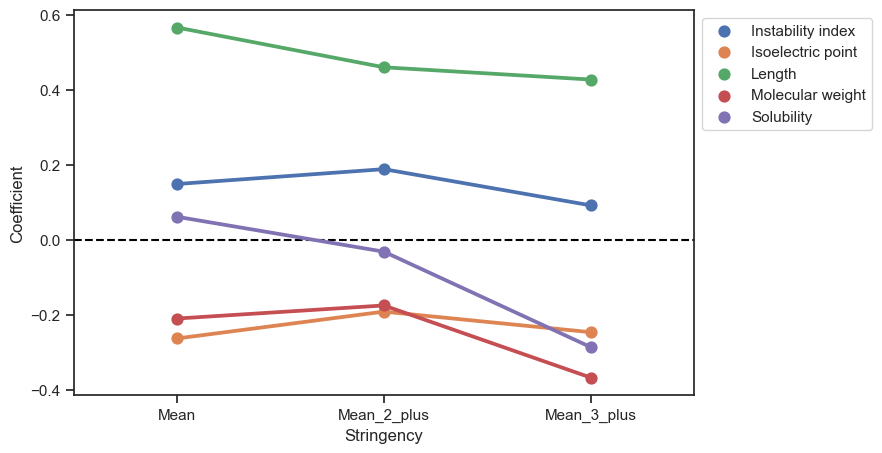

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

features=["Length", "Molecular weight", "Isoelectric point", "Instability index", "Solubility"]

sns.pointplot(x="Stringency", y="Coefficient", hue="index", data=all_coefs_melted[all_coefs_melted["index"].isin(features)], 
    order=["Mean", "Mean_2_plus", "Mean_3_plus"])
ax.axhline(y=0, color="black", linestyle="--")
ax.legend(bbox_to_anchor=(1.3, 1))
plt.show()

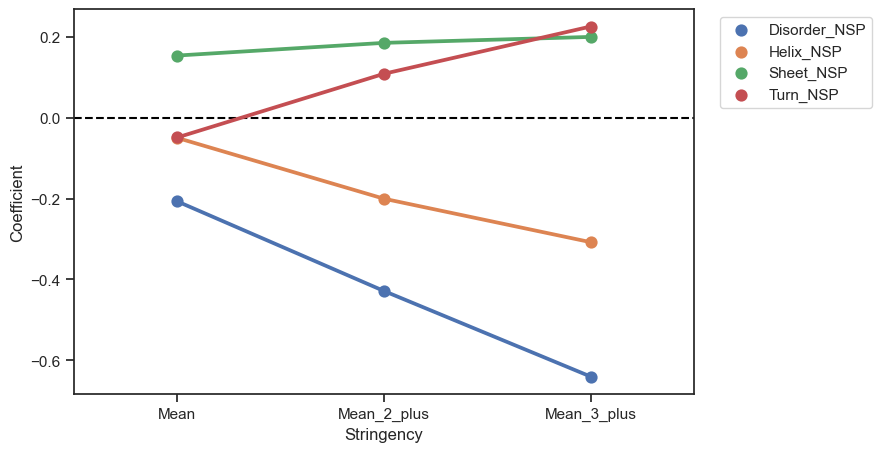

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

features=["Disorder_NSP", "Helix_NSP", "Turn_NSP", "Sheet_NSP"]

sns.pointplot(x="Stringency", y="Coefficient", hue="index", data=all_coefs_melted[all_coefs_melted["index"].isin(features)], 
    order=["Mean", "Mean_2_plus", "Mean_3_plus"])
ax.axhline(y=0, color="black", linestyle="--")
ax.legend(bbox_to_anchor=(1.3, 1))
plt.show()

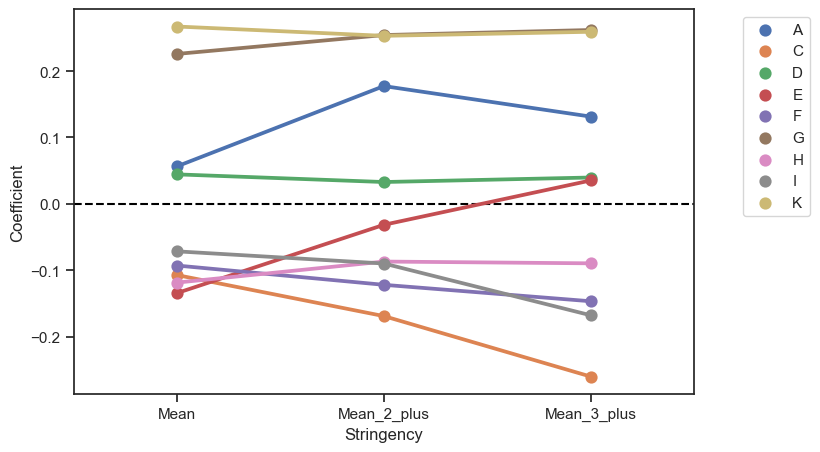

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

features=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K']

sns.pointplot(x="Stringency", y="Coefficient", hue="index", data=all_coefs_melted[all_coefs_melted["index"].isin(features)], 
    order=["Mean", "Mean_2_plus", "Mean_3_plus"])
ax.axhline(y=0, color="black", linestyle="--")
ax.legend(bbox_to_anchor=(1.2, 1))
plt.show()

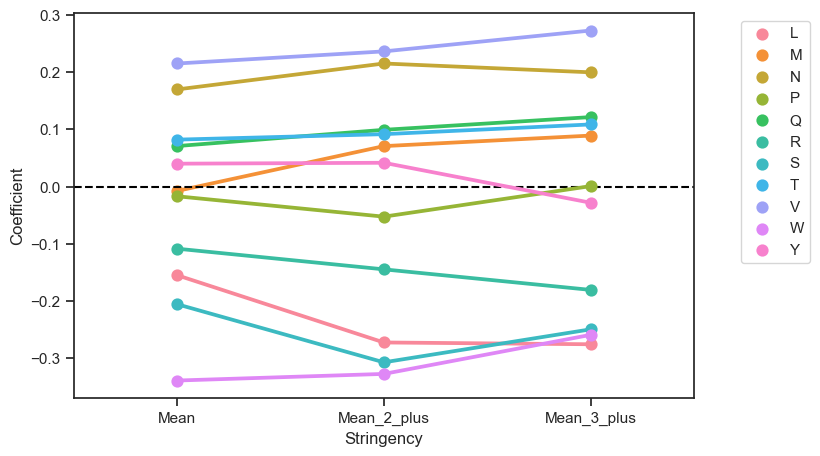

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

features=['L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

sns.pointplot(x="Stringency", y="Coefficient", hue="index", data=all_coefs_melted[all_coefs_melted["index"].isin(features)], 
    order=["Mean", "Mean_2_plus", "Mean_3_plus"])
ax.axhline(y=0, color="black", linestyle="--")
ax.legend(bbox_to_anchor=(1.2, 1))
plt.show()

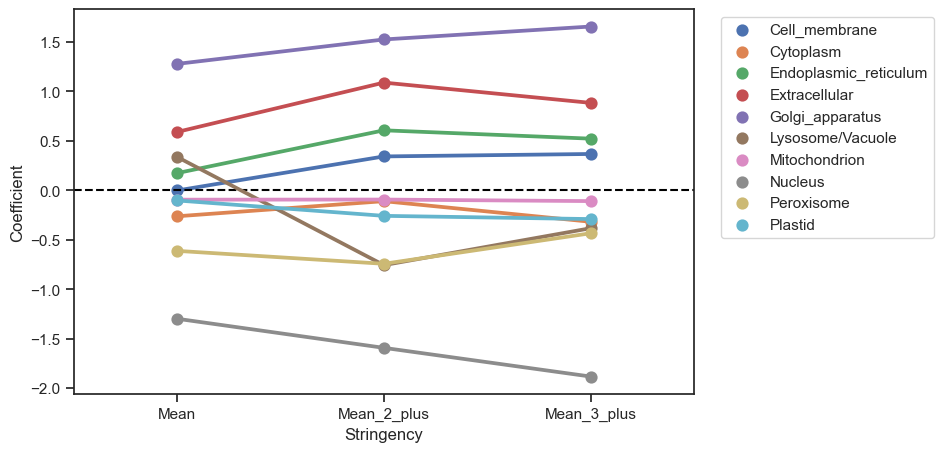

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

features=["Signal_peptide", "Cytoplasm", "Extracellular", "Lysosome/Vacuole", "Nucleus", "Cell_membrane", "Endoplasmic_reticulum", "Mitochondrion",
          "Golgi_apparatus", "Peroxisome", "Plastid"]

sns.pointplot(x="Stringency", y="Coefficient", hue="index", data=all_coefs_melted[all_coefs_melted["index"].isin(features)], 
    order=["Mean", "Mean_2_plus", "Mean_3_plus"])
ax.axhline(y=0, color="black", linestyle="--")
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

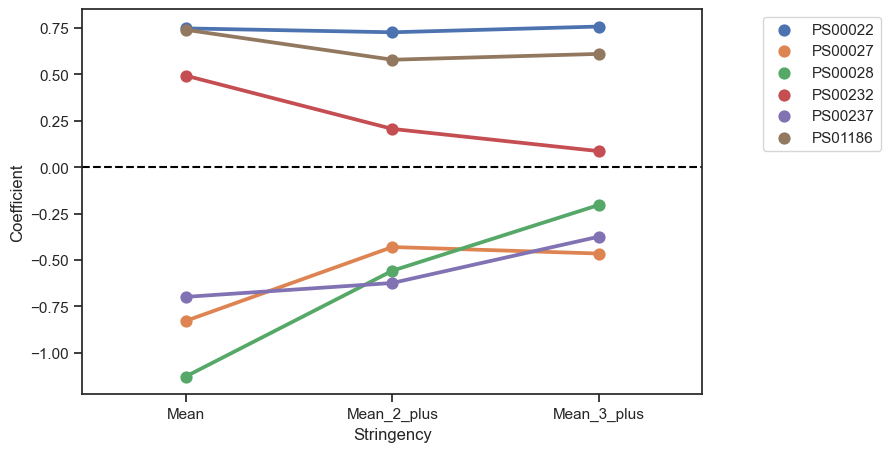

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

features=["PS00232", "PS00237", "PS00027", "PS00028", "PS00022", "PS01186"]

sns.pointplot(x="Stringency", y="Coefficient", hue="index", data=all_coefs_melted[all_coefs_melted["index"].isin(features)], 
    order=["Mean", "Mean_2_plus", "Mean_3_plus"])
ax.axhline(y=0, color="black", linestyle="--")
ax.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## Decision tree

In [136]:
dt = DecisionTreeClassifier()
dt.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier()

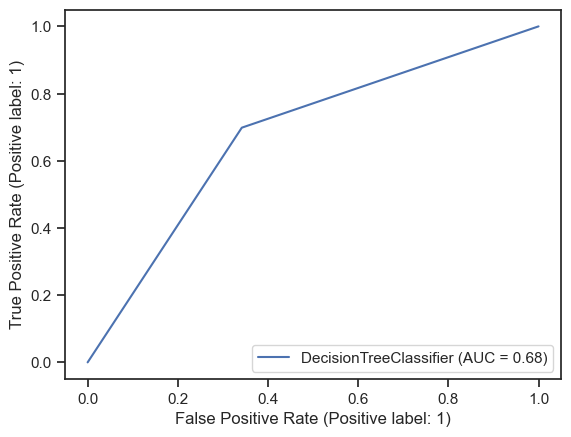

In [137]:
RocCurveDisplay.from_estimator(dt, X_test_scal, y_test)
plt.show()

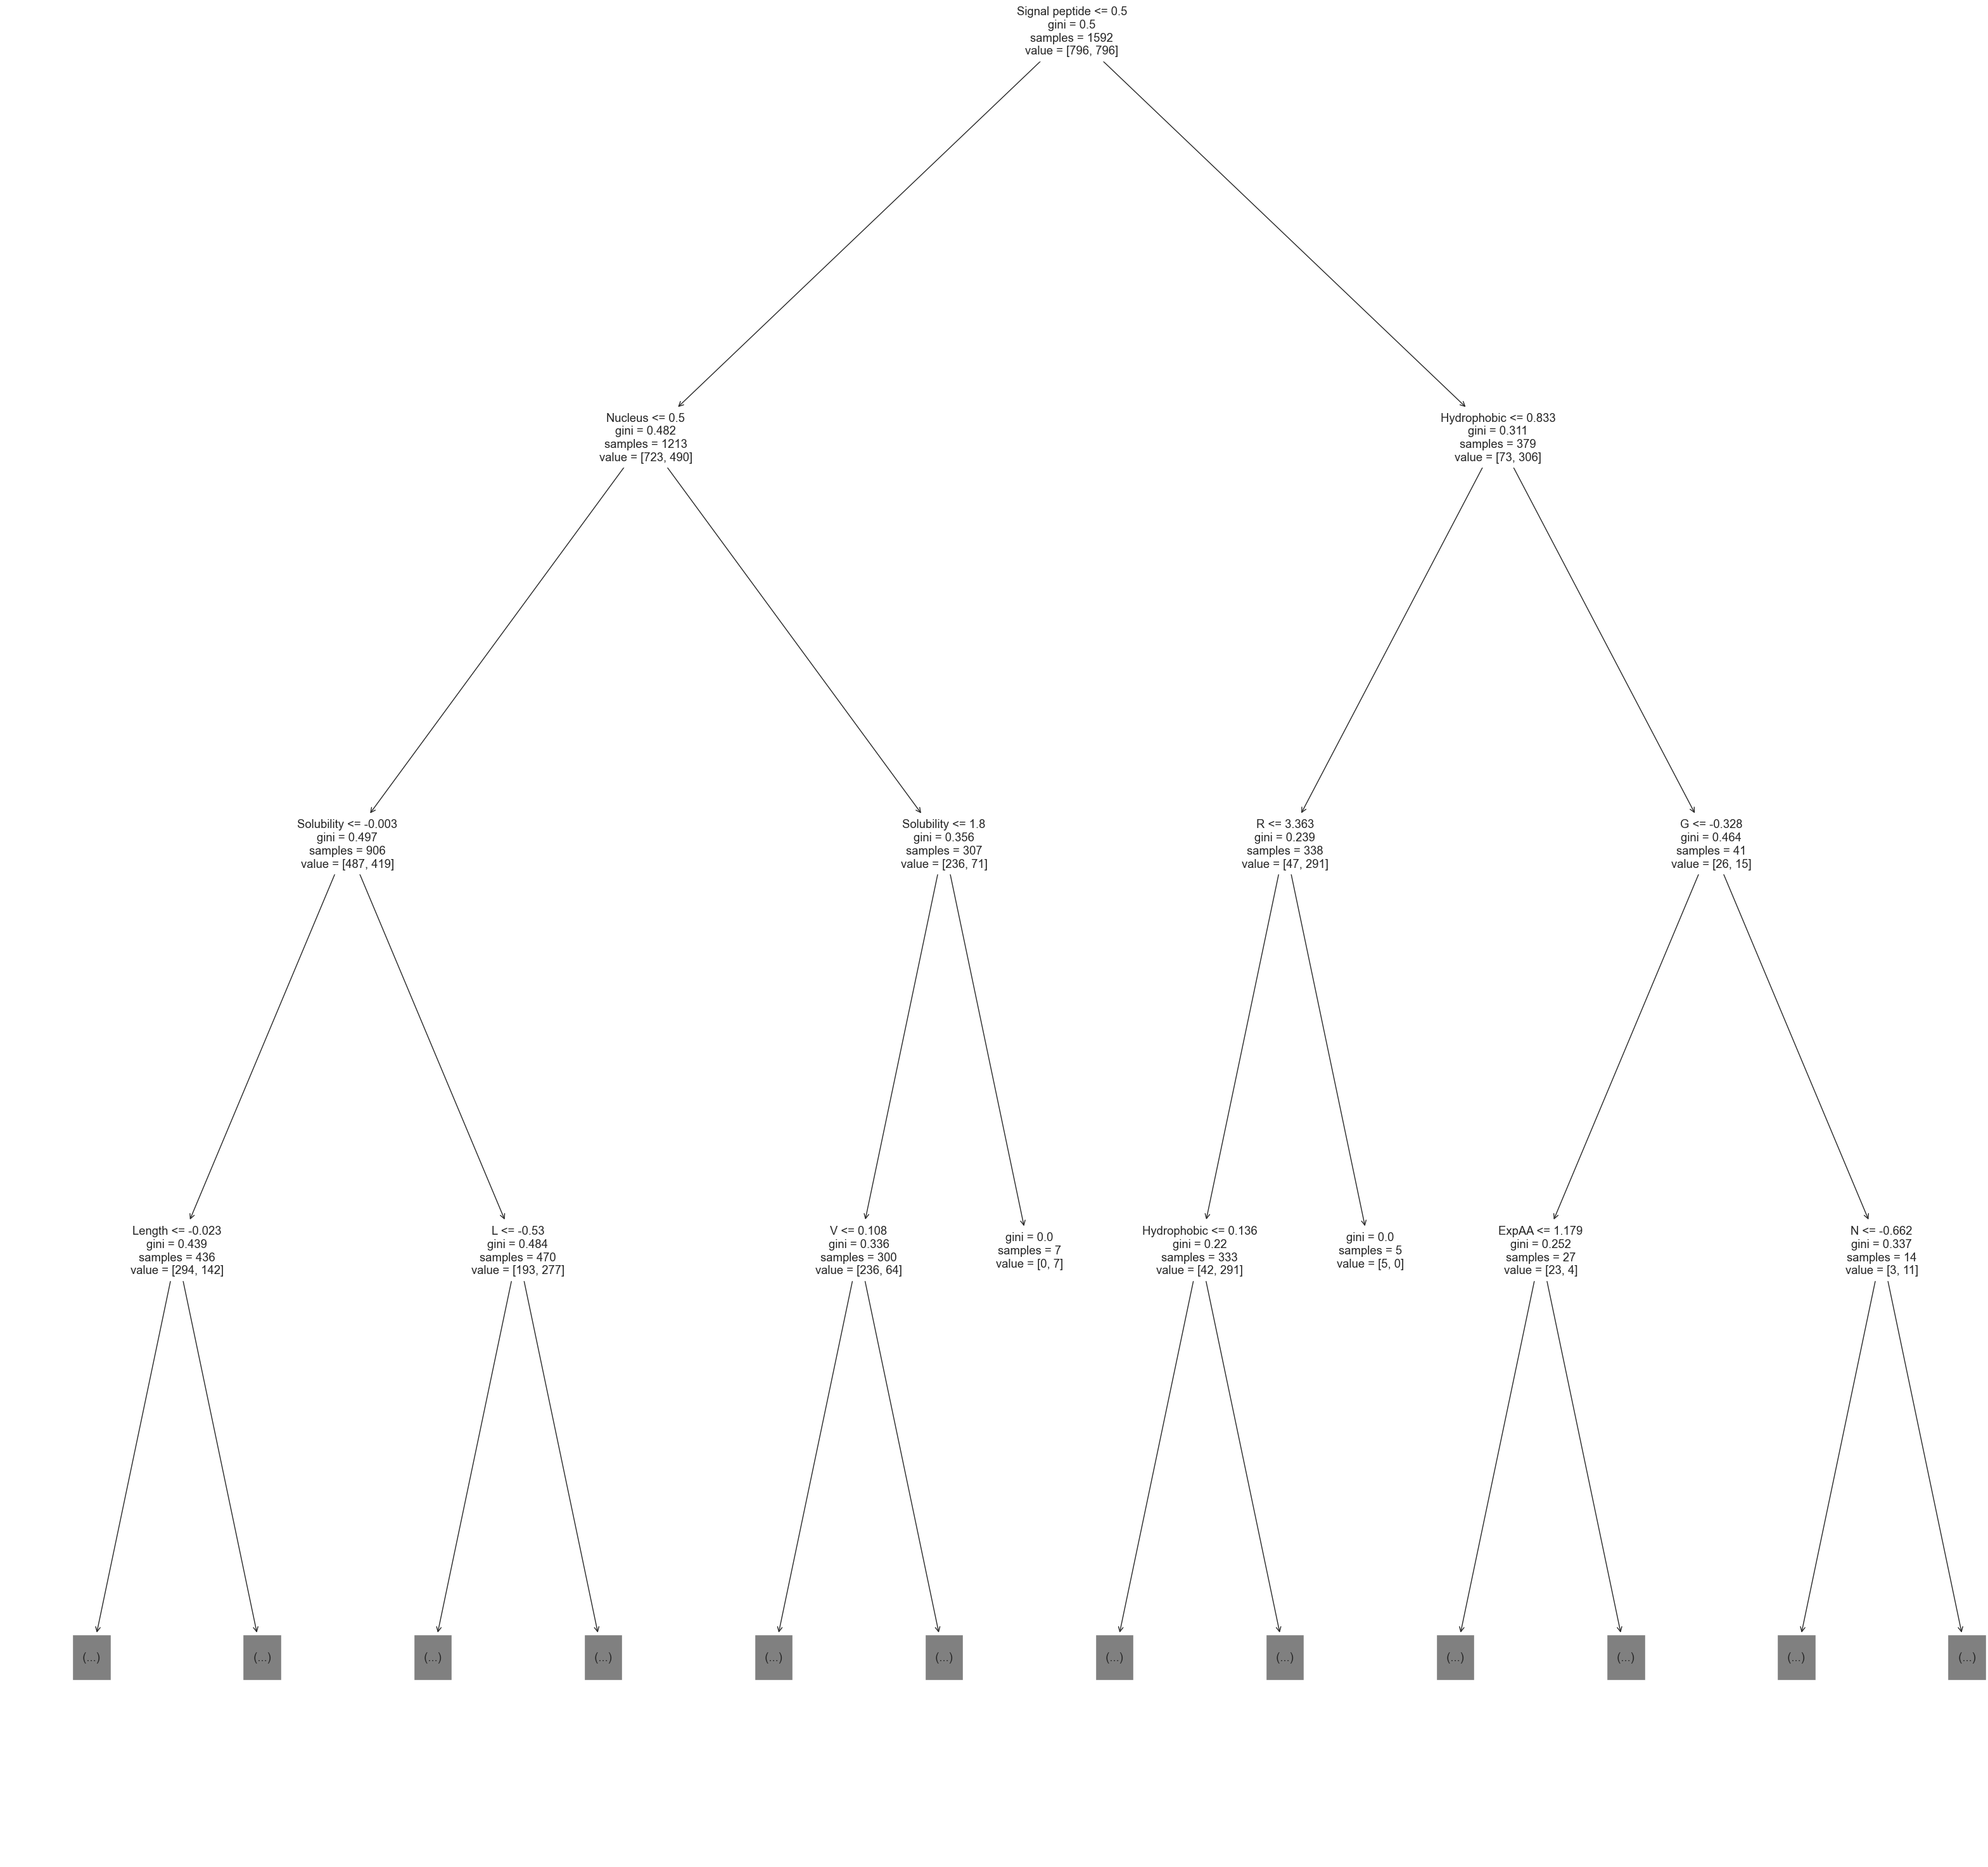

In [138]:
fig, ax = plt.subplots(figsize=(30,30))

plot_tree(dt, max_depth=3, feature_names=X_train_bal.columns)
plt.show()